In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import  plot_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# 1. Data overview

In [35]:
# load data (最後兩行&第一行(ID) 不取)
df = pd.read_csv('BankChurners.csv').iloc[:,1:-2] 

## 1.1  Check data

In [3]:
print(df.shape)
print('')
print('-'*70)
display(df.head())
print('')
print('-'*70)
df.info()

(10127, 20)

----------------------------------------------------------------------


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000



----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  fl

In [12]:
df.describe().round(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [106]:
# stats of categorical data
df.describe(include=[np.object])  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [70]:
# 數字特徵
numeric_features = df.select_dtypes(include='number').columns.tolist()
print('numeric features : \n', numeric_features)
print('-'*70)
# 類別特徵
categorical_features = df.select_dtypes(include='object').columns.tolist() 
print('categorical feature : \n', categorical_features)

numeric features : 
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
----------------------------------------------------------------------
categorical feature : 
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [15]:
# 查看 類別特徵 的唯一值
for i in list(categorical_features):
    print('*************************')
    print('{0} 的唯一值如下：{1}'.format(i,df[i].nunique()))
    print(df[i].unique())

*************************
Attrition_Flag 的唯一值如下：2
['Existing Customer' 'Attrited Customer']
*************************
Gender 的唯一值如下：2
['M' 'F']
*************************
Education_Level 的唯一值如下：7
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
*************************
Marital_Status 的唯一值如下：4
['Married' 'Single' 'Unknown' 'Divorced']
*************************
Income_Category 的唯一值如下：6
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
*************************
Card_Category 的唯一值如下：4
['Blue' 'Gold' 'Silver' 'Platinum']


## 1.2 Missing value check

In [8]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* 雖然上面沒有nan的缺失值，但在分類變量中卻有unknown
* Nan 值一個單獨的類（unknown）是處理分類變量中缺失值的一種方法

## 1.3 Dealing with duplicated values

In [16]:
print('Number of duplicated values in dataset: ', df.duplicated().sum())
# 有重複值就 删除重复值 → data = data.drop_duplicates()

Number of duplicated values in dataset:  0


# 2. Feature analysis (EDA)

#### EDA tasks:

* <b>Check the target variable: <b>
    
    - Amount of attrition.

    
* <b>Check the demographic variables: <b>
    
    - Age vs attrition.
    - Gender vs churn.
    - Number of dependents vs churn.
    - Education level vs churn.
    - Marital status vs churn.
    - Income category vs churn.

    
* <b>Check the product variables: <b>
    
    - Type of card vs churn. 
    - Relationship with the bank vs churn.
    - Number of products vs churn.
    - Inactive months vs churn.
    - Number of contacts vs churn.
    - Credit Limit vs churn.
    - Total resolving balance vs churn.
    - Openness To Buy Credit Line vs churn.
    - Transaction Amount Change vs churn.
    - Transaction Count Change vs churn.
    - Average Card Utilization Ratio vs churn.

## 2.1 Target variable

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


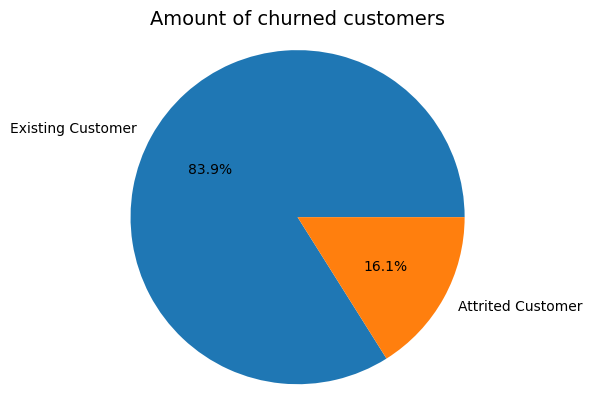

In [17]:
target = df["Attrition_Flag"].value_counts()
print(target)

fig1, ax1 = plt.subplots()
ax1.pie(target, radius=1.5, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

## 2.2 Categorical features
* 離散型特徵看 分組對比差異

In [49]:
# 定義 類別特徵 繪製函數
def countplot_categorical(cats,data):
    
    fig, axes = plt.subplots(2,3, figsize=(22, 16))
    axes = axes.flatten()
    fig.suptitle('Categorical Features Distributions',fontsize=30)

    for ax, cat in zip(axes, cats):
        total = float(len(data[cat]))
        sns.countplot(data[cat], palette="Blues_r", ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")
        
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
        plt.ylabel('Count', fontsize=15, weight='bold')
        

#        
def countplot_churn(cats, data):
    
    fig, axes = plt.subplots(2, 3, figsize=(22, 16))
    axes = axes.flatten()
    fig.suptitle('Categorical Features Distributions by Churn',fontsize=30)
    
    for ax, cat in zip(axes, cats):
        if cat == 'Attrition_Flag':
            sns.countplot(data[cat], palette='Blues_r', ax=ax)

        else:
            # sns.count(data[cat],hue='Attrition_Flag',palette='rocket',ax=ax)
            sns.countplot(x=cat,
                          data=data,
                          hue='Attrition_Flag',
                          palette='Blues_r',
                          ax=ax)
            ax.legend(title='Churn',
                      loc='upper right',
                      labels=['No', 'Yes'])
            
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
        plt.ylabel('Count', fontsize=15, weight='bold')

In [7]:
churned = df[df['Attrition_Flag'] == "Attrited Customer"]
nonchurned = df[df['Attrition_Flag'] == "Existing Customer"]

def pie_compare(column):
    churnedtarget = churned[column].value_counts()
    nonchurnedtarget = nonchurned[column].value_counts()  
    
    fig1, axs = plt.subplots(1, 2)
    axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
    axs[0].axis('equal')
    axs[0].set_title('Existing customers')
    
    axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
    axs[1].axis('equal')
    axs[1].set_title('Churning customers')
    
    plt.show()
    

### 2.2.1 類別變數觀察

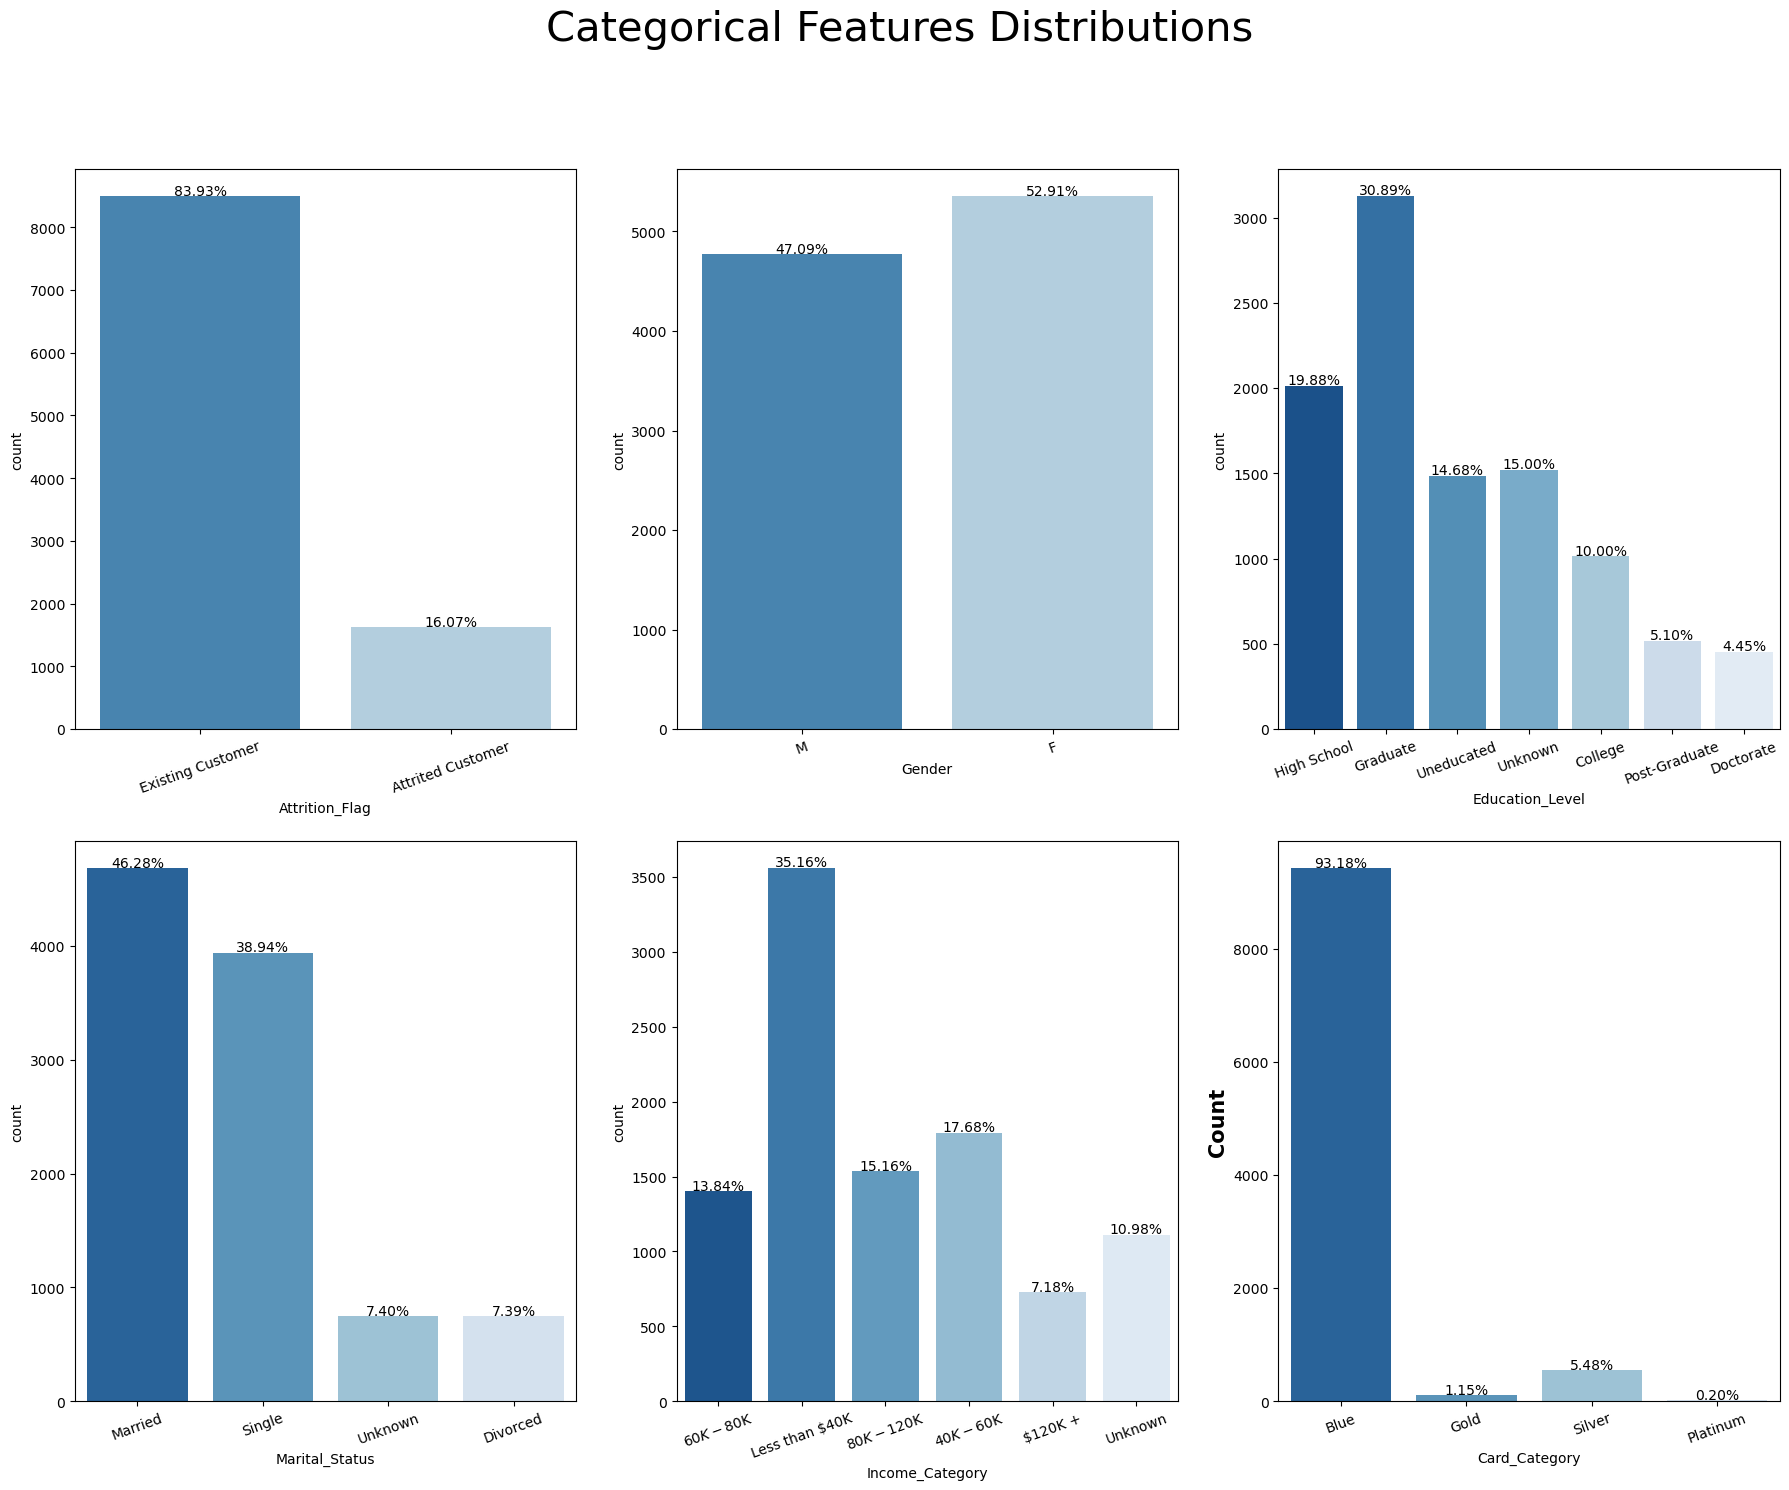

In [19]:
countplot_categorical(categorical_features, df)

可以得出以下結論：
1. target 比例失衡
2. 總體男女比例差不多
3. 大多數人具有研究生教育水平，其次是高中。 15% 的人口的教育水平未知。
4. 總體中有結婚跟單身比例差不多
5. 總體中的收入 一半在60K以下
6. 大部分都是藍卡

###   2.2.2 全體 類別變數 流失/未流失  觀察

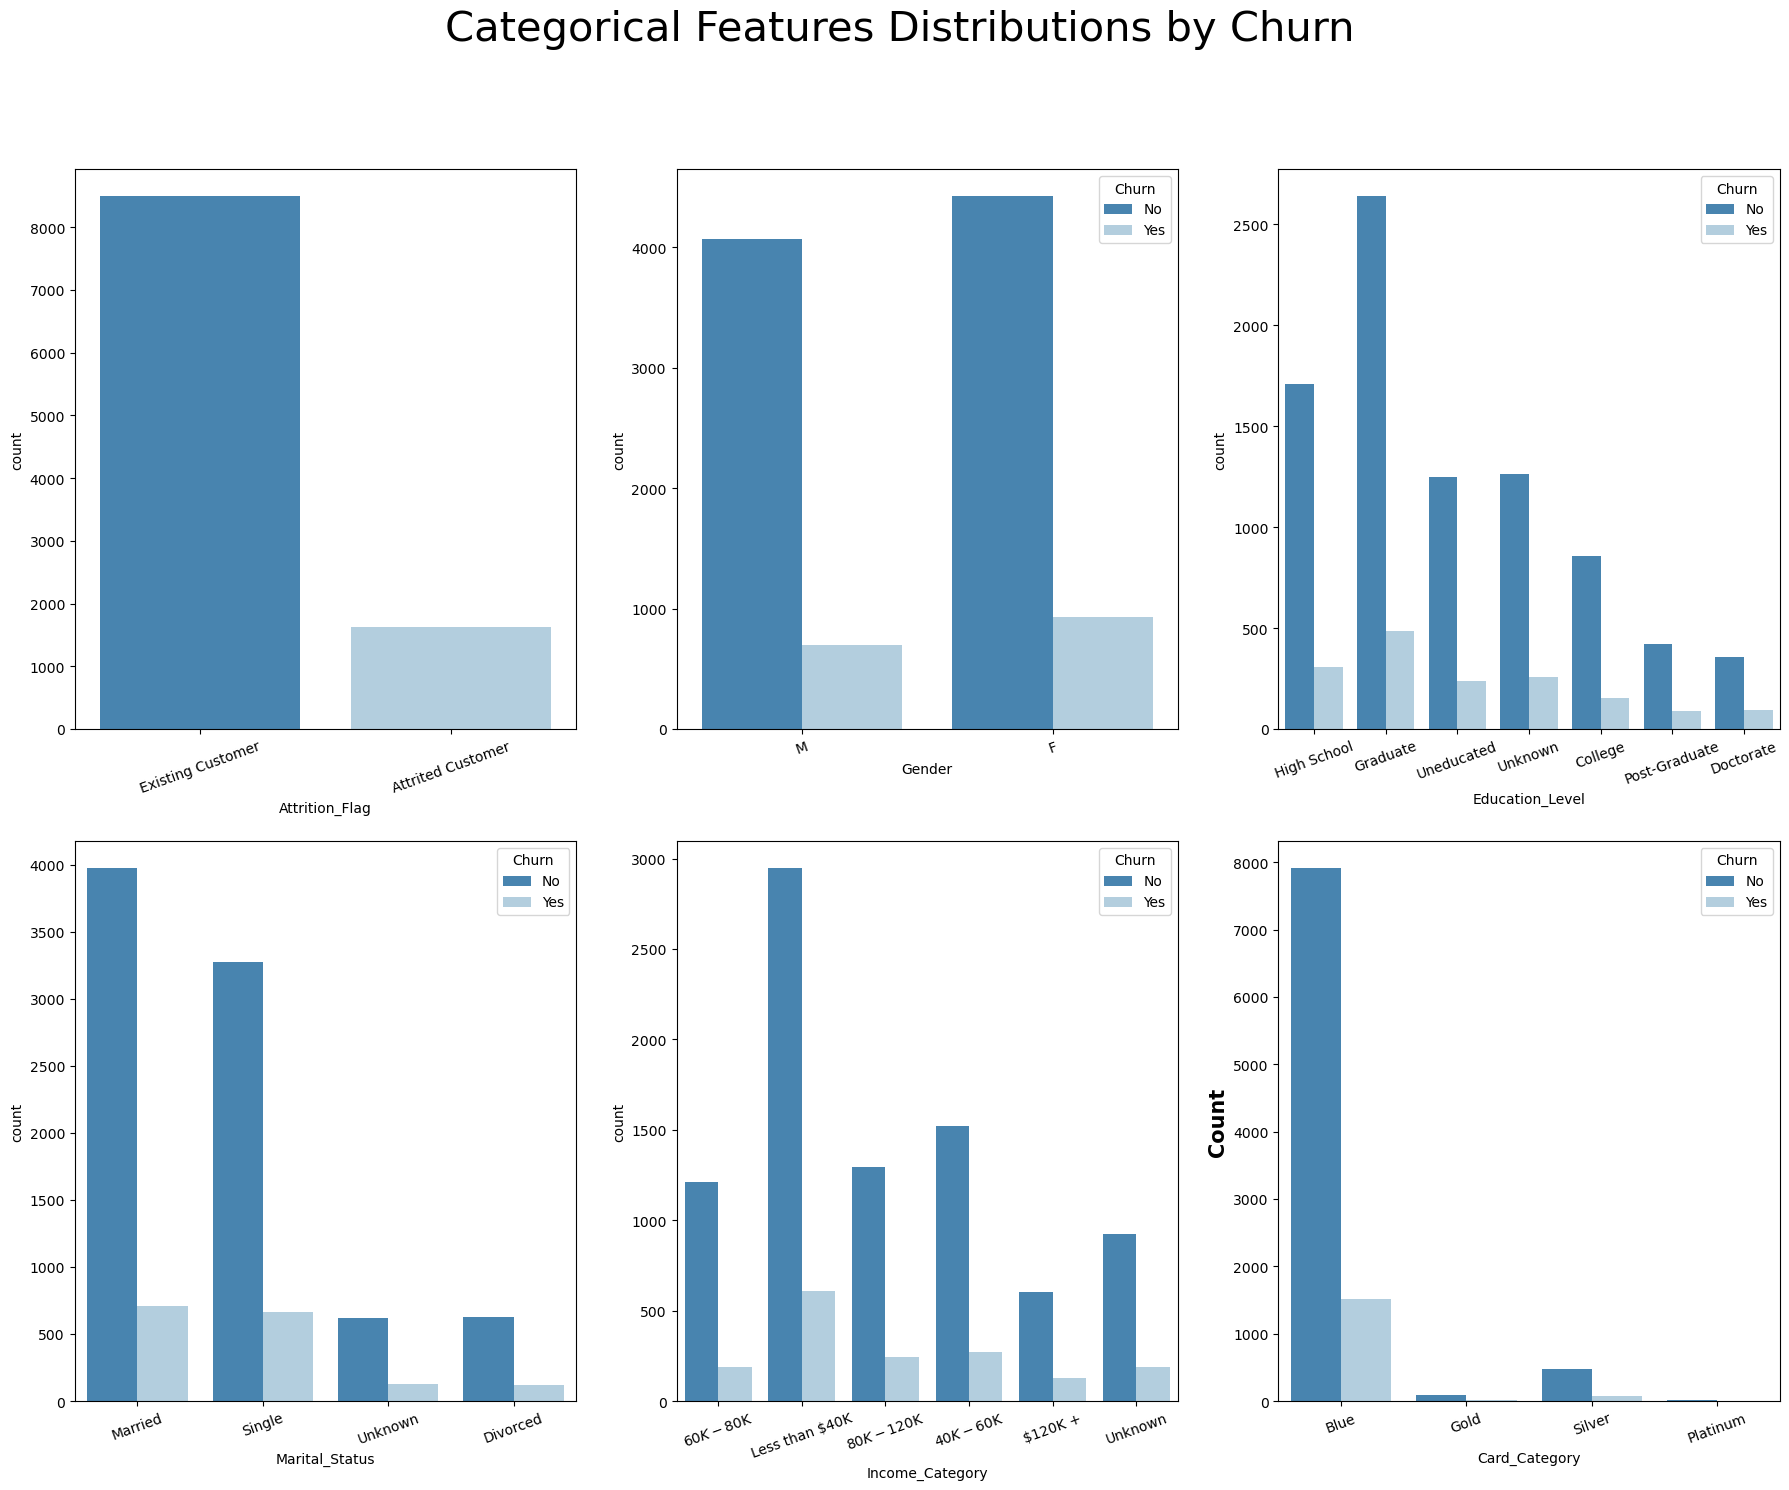

In [20]:
# 區分成churn/churned 的 barchart
countplot_churn(categorical_features, df)

從流失/存在的群體中，可以得出以下結論：
* 分佈狀況無明顯差異 : 男女比、教育程度、婚姻狀態、收入狀況、卡片種類


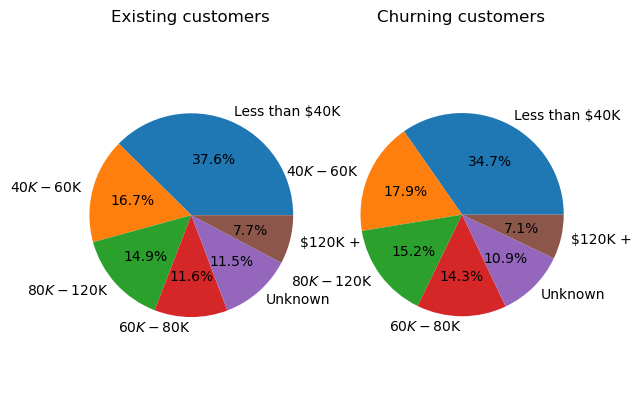

In [13]:
pie_compare('Income_Category')

###  2.2.3 數字特徵中的離散特徵 count chart (bar chart)

In [ ]:
# 把 數字特徵中的離散特徵抓取出來
e = ['Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

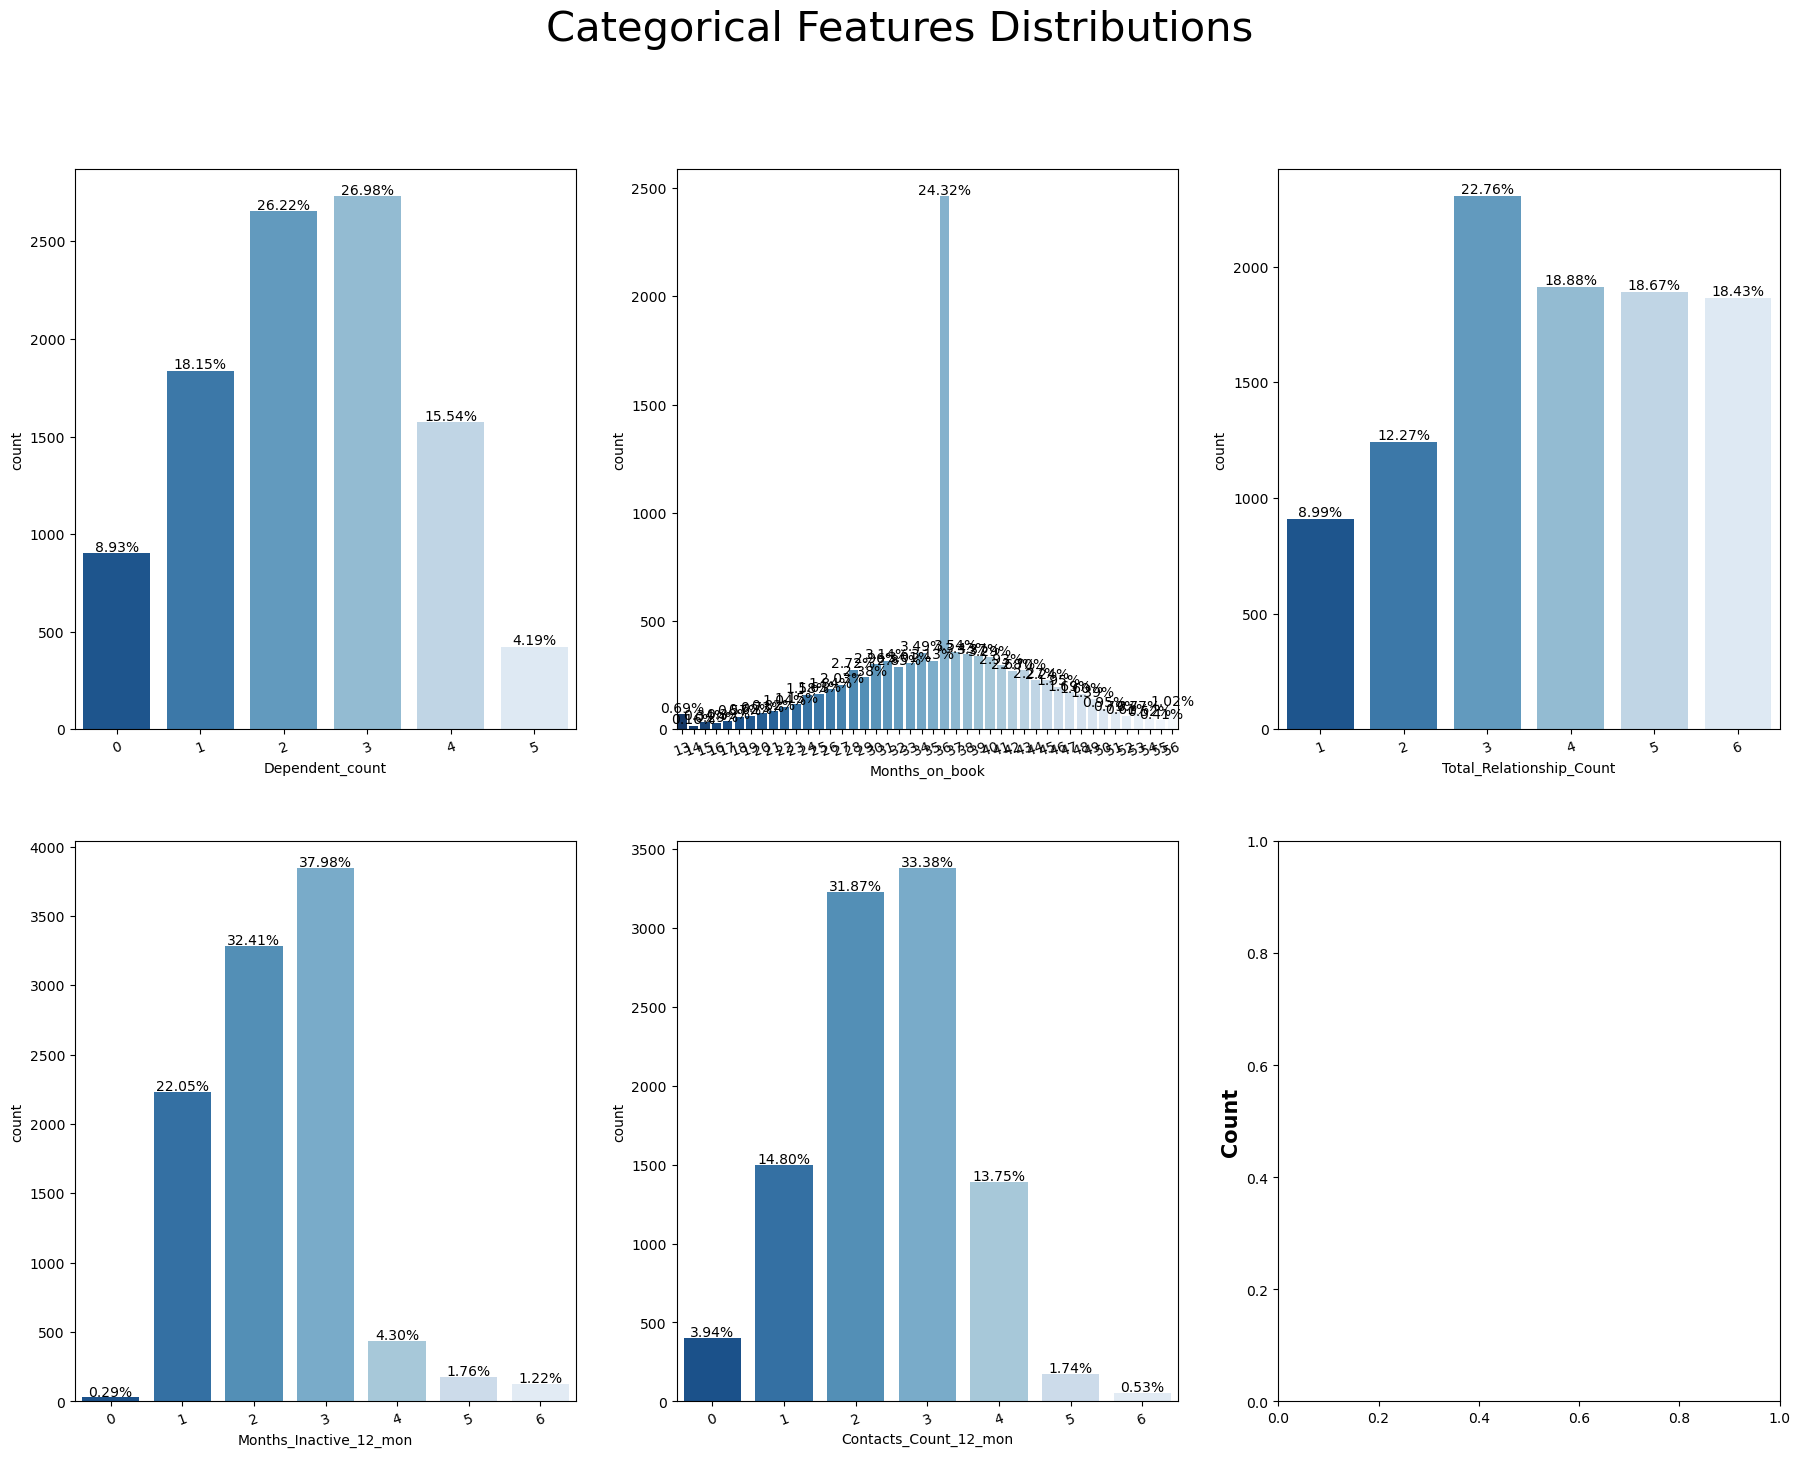

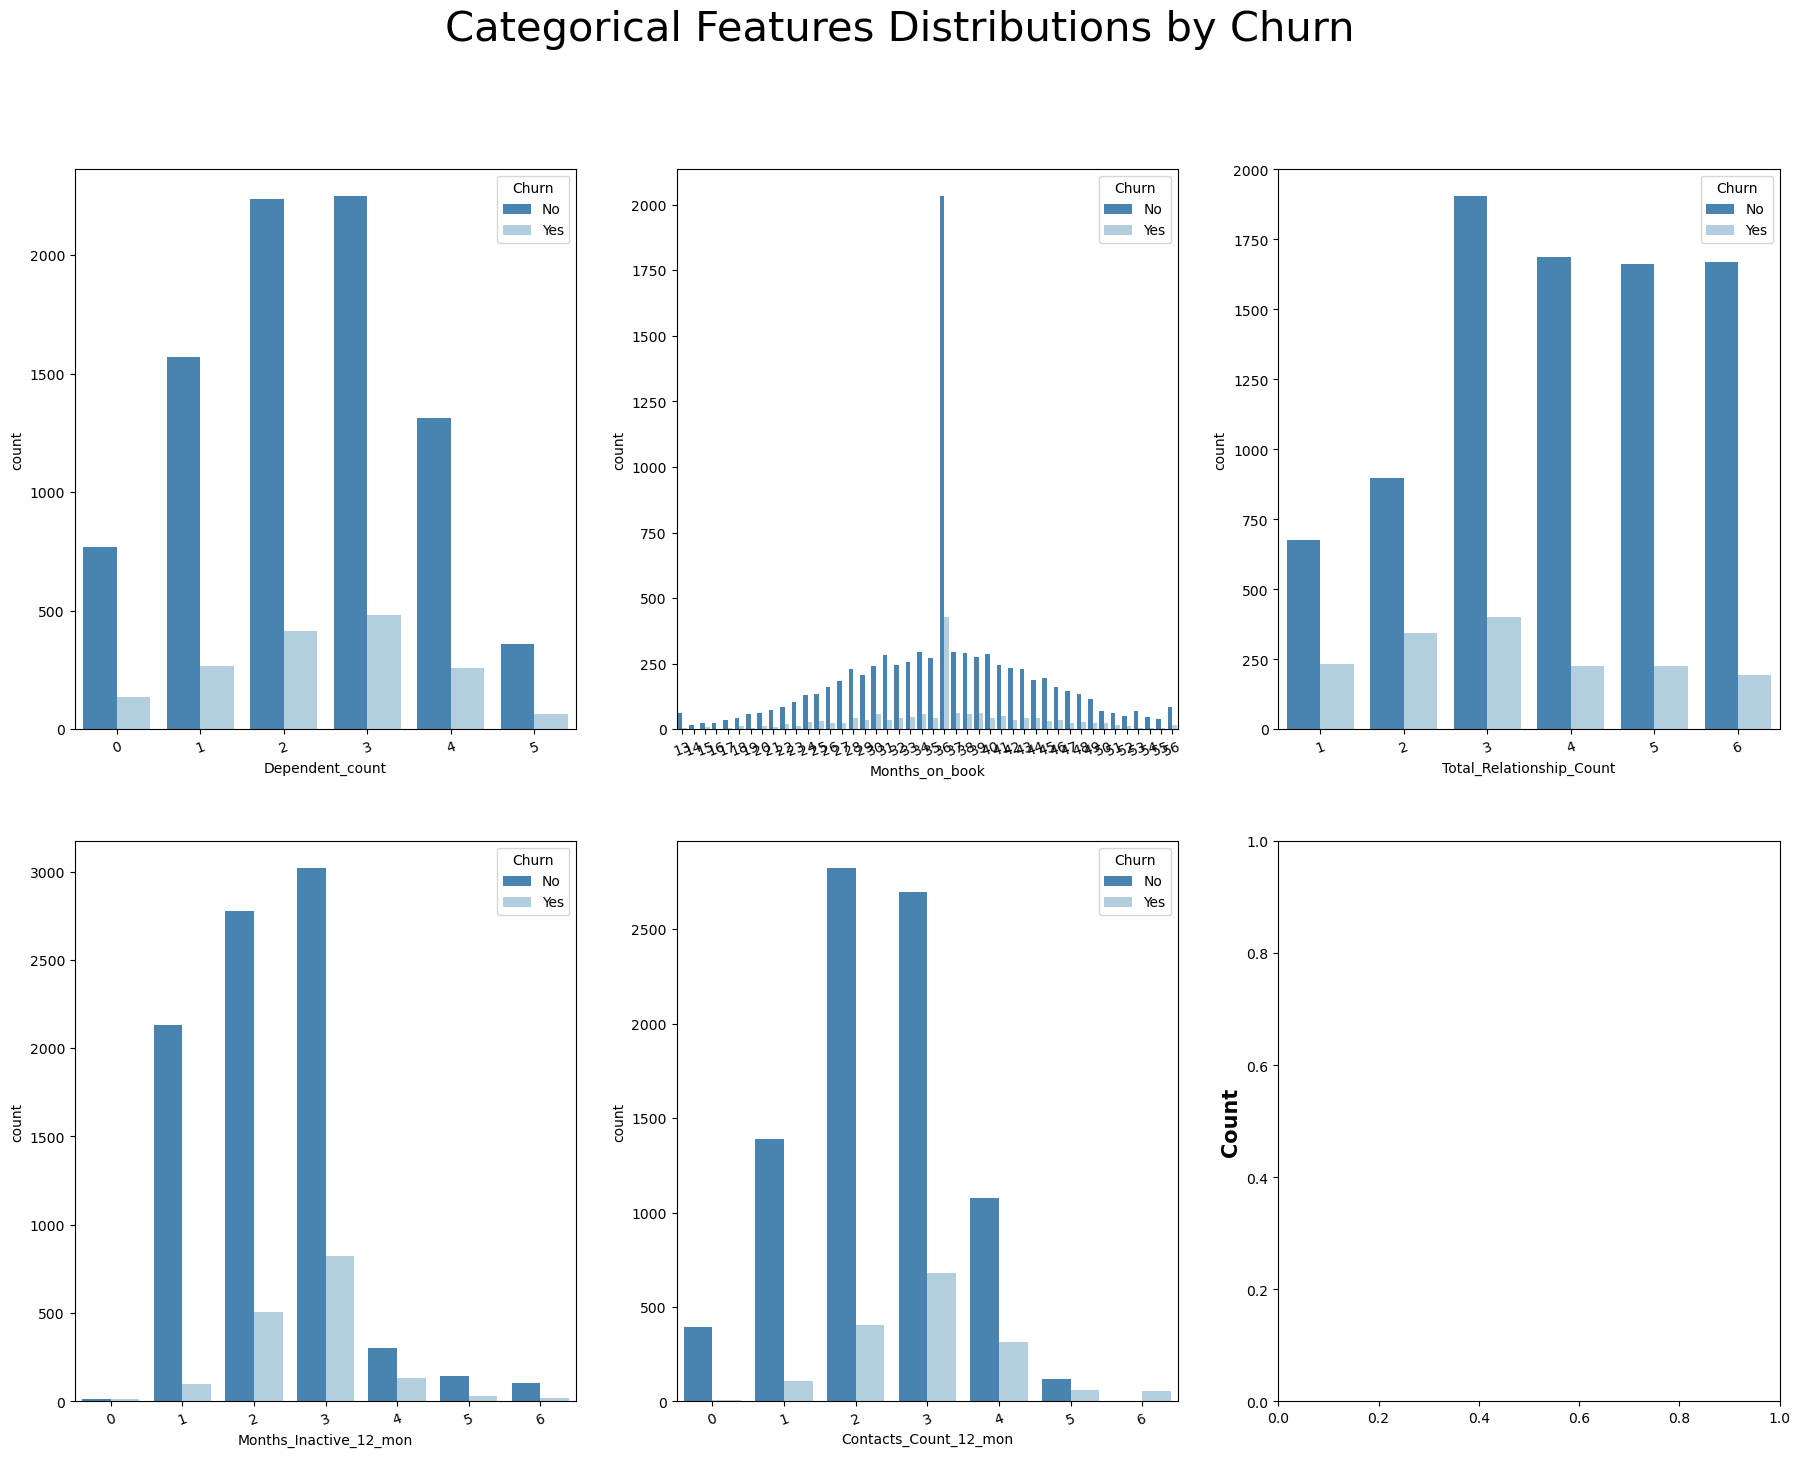

In [115]:
# 數字特徵中的離散特徵 count chart (bar chart)
countplot_categorical(e, df)
countplot_churn(e, df)

從 數值型離散資料可以發現 :

1. Total_Relationship_Count(客戶持有商品數量) : 未流失的客戶往往比流失的客戶購買更多的產品。
2. Months_Inactive_12_mon(最近12个月内不活動的月份數) : 很明顯，大多數客戶都顯示 3 個月不活動。 可以說，大部分活躍會員（少於3個月）都可以在非流失客戶中找到。
3. Contacts_Count_12_mon (最近12个月的聯繫人数) : 流失的客戶最有可能比非流失的客戶有更多的聯繫。 儘管差異不大，但仍然很明顯。
受撫養人數、與銀行關係月份數 這兩種特徵的 流失/未流失 分佈差異不大

###  2.2.4 unknown的資料狀態 查看

*  含Unknown : Income_Category, Education_Level,  Marital_Status

#### 2.2.4.1 Income_Category

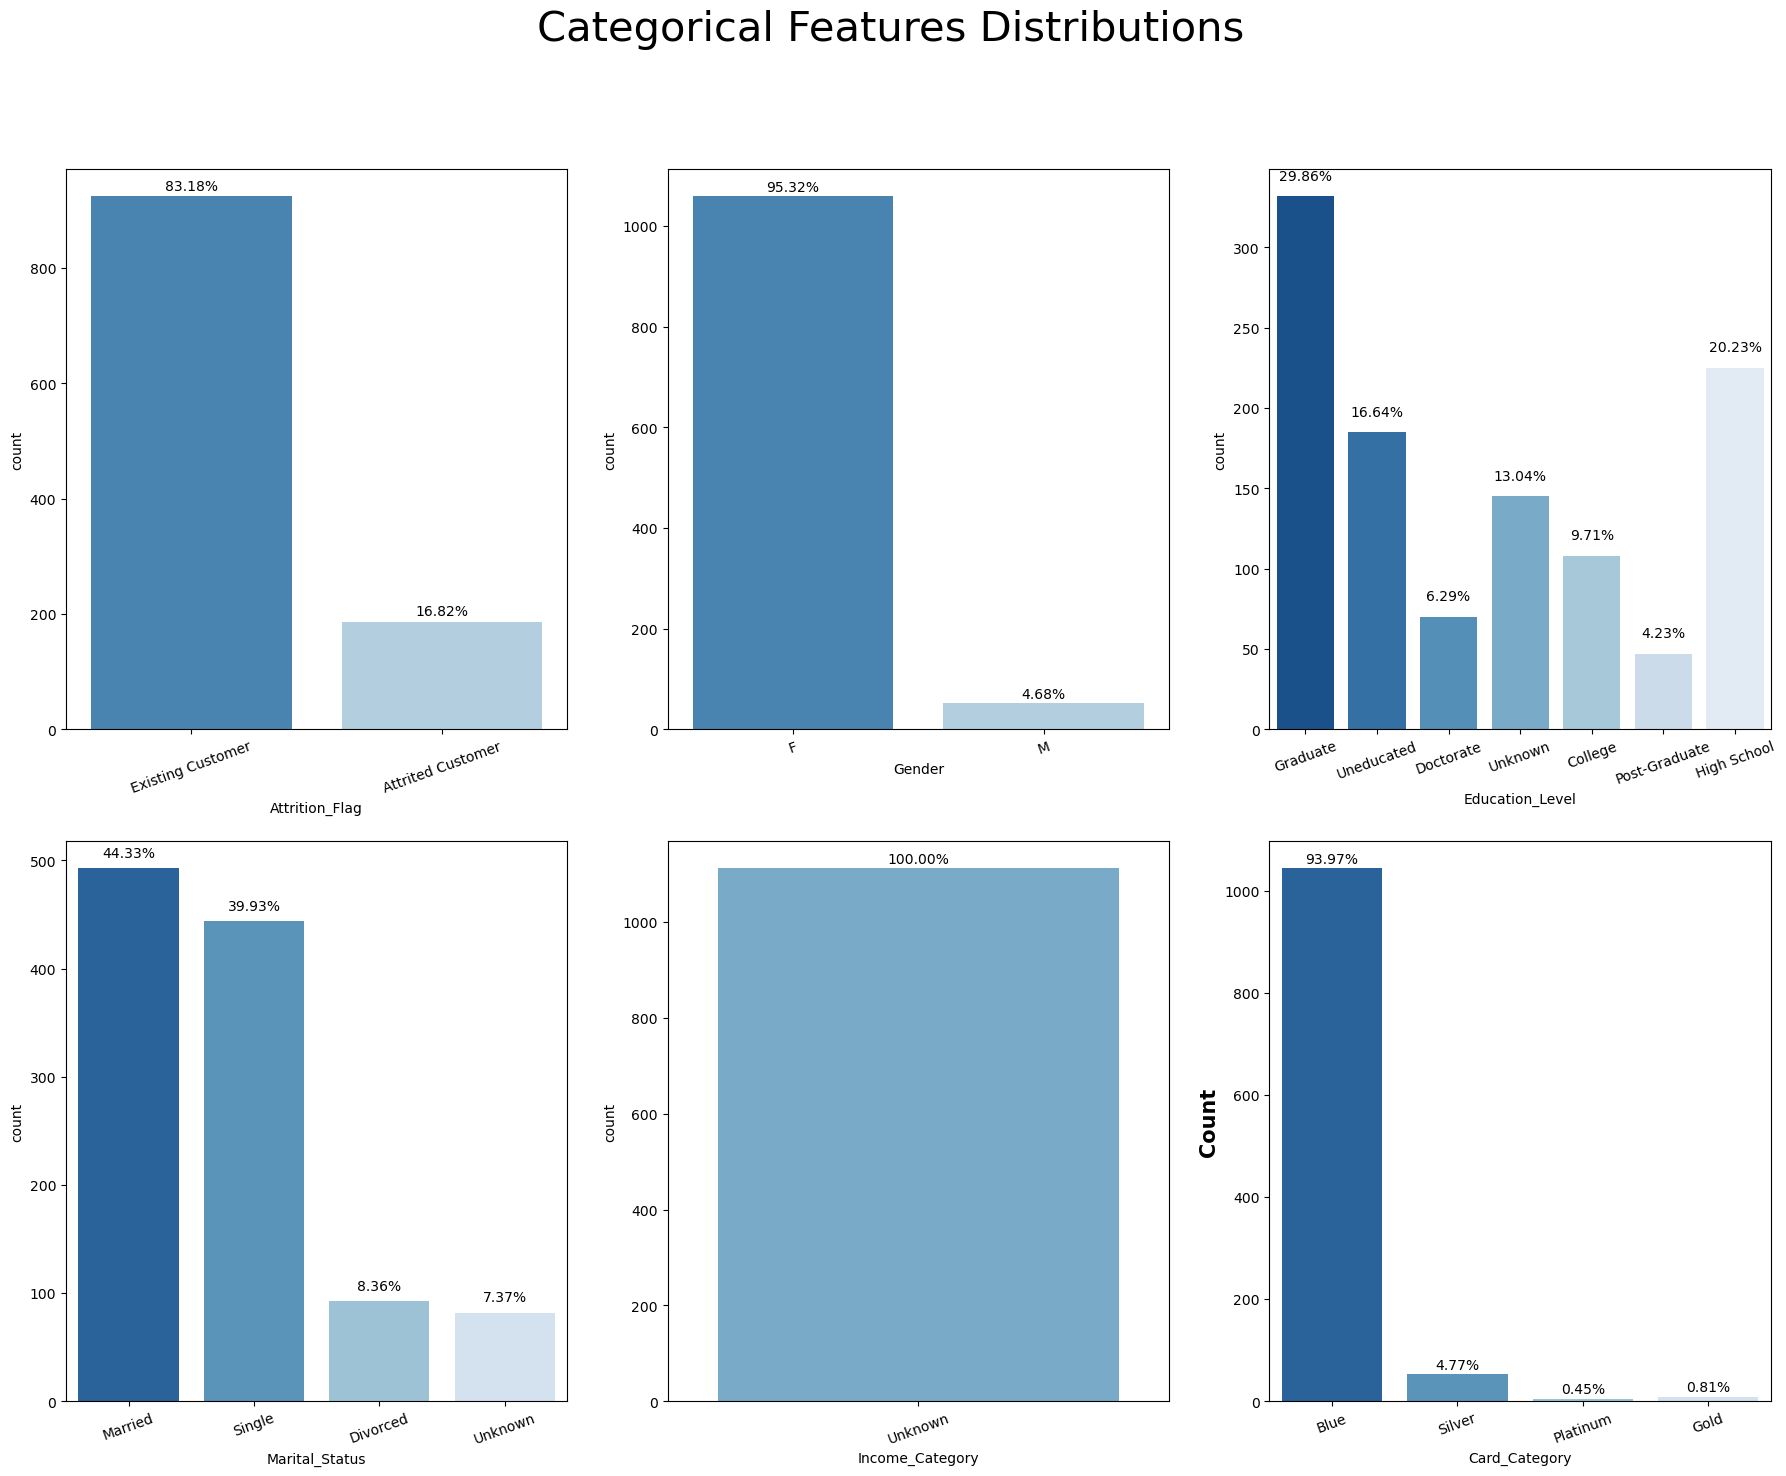

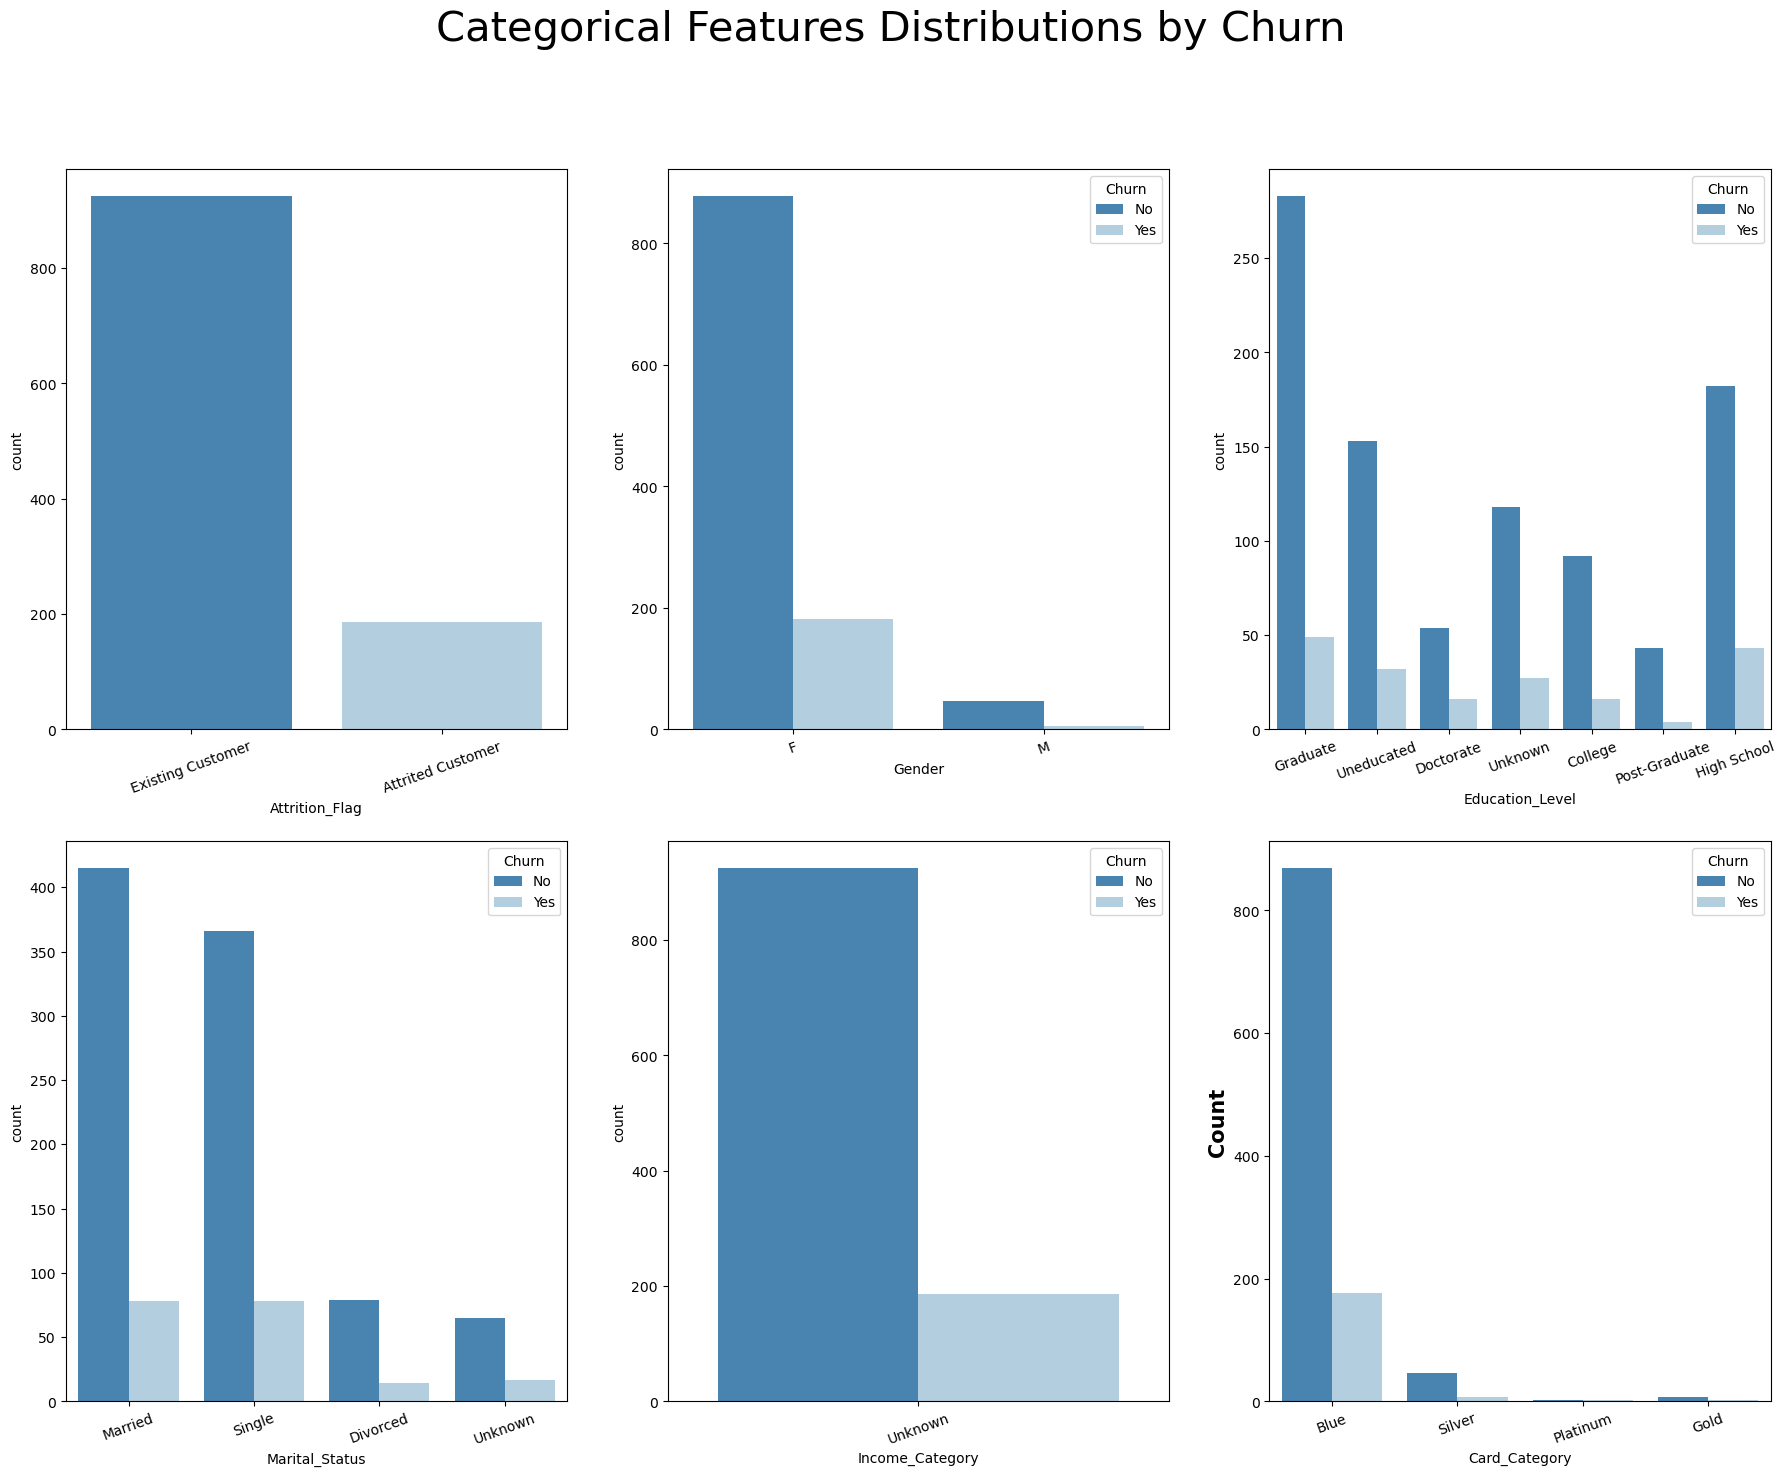

In [107]:
countplot_categorical(categorical_features, df[df['Income_Category']=='Unknown'])
countplot_churn(categorical_features, df[df['Income_Category']=='Unknown'])

未知'收入'觀察到的點:
1. 幾乎都是女性
2. 但 流失的比重跟原本相似

#### 2.2.4.2 Education_Level

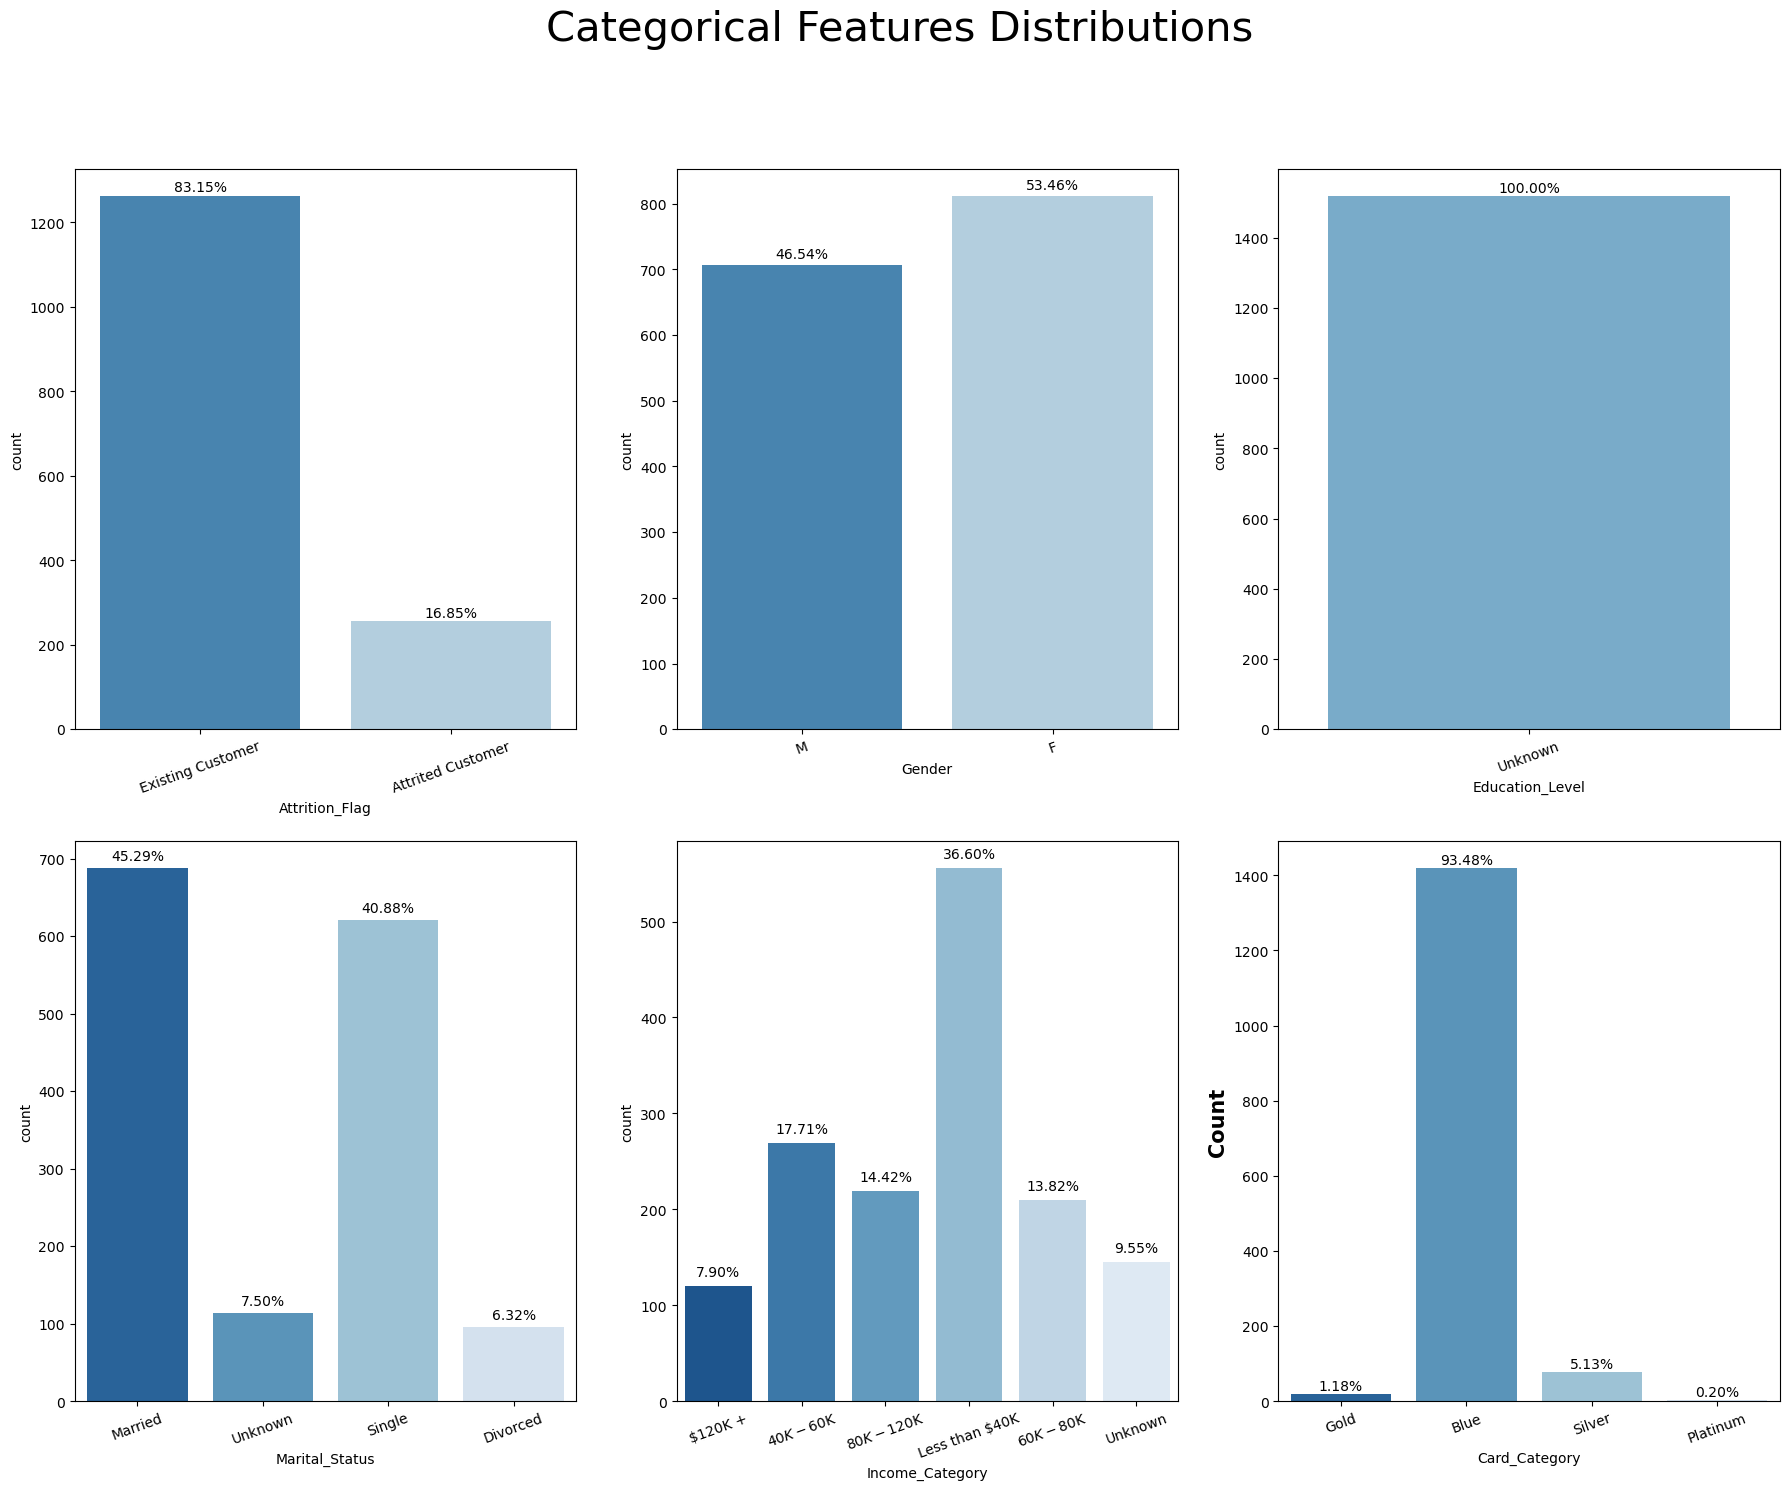

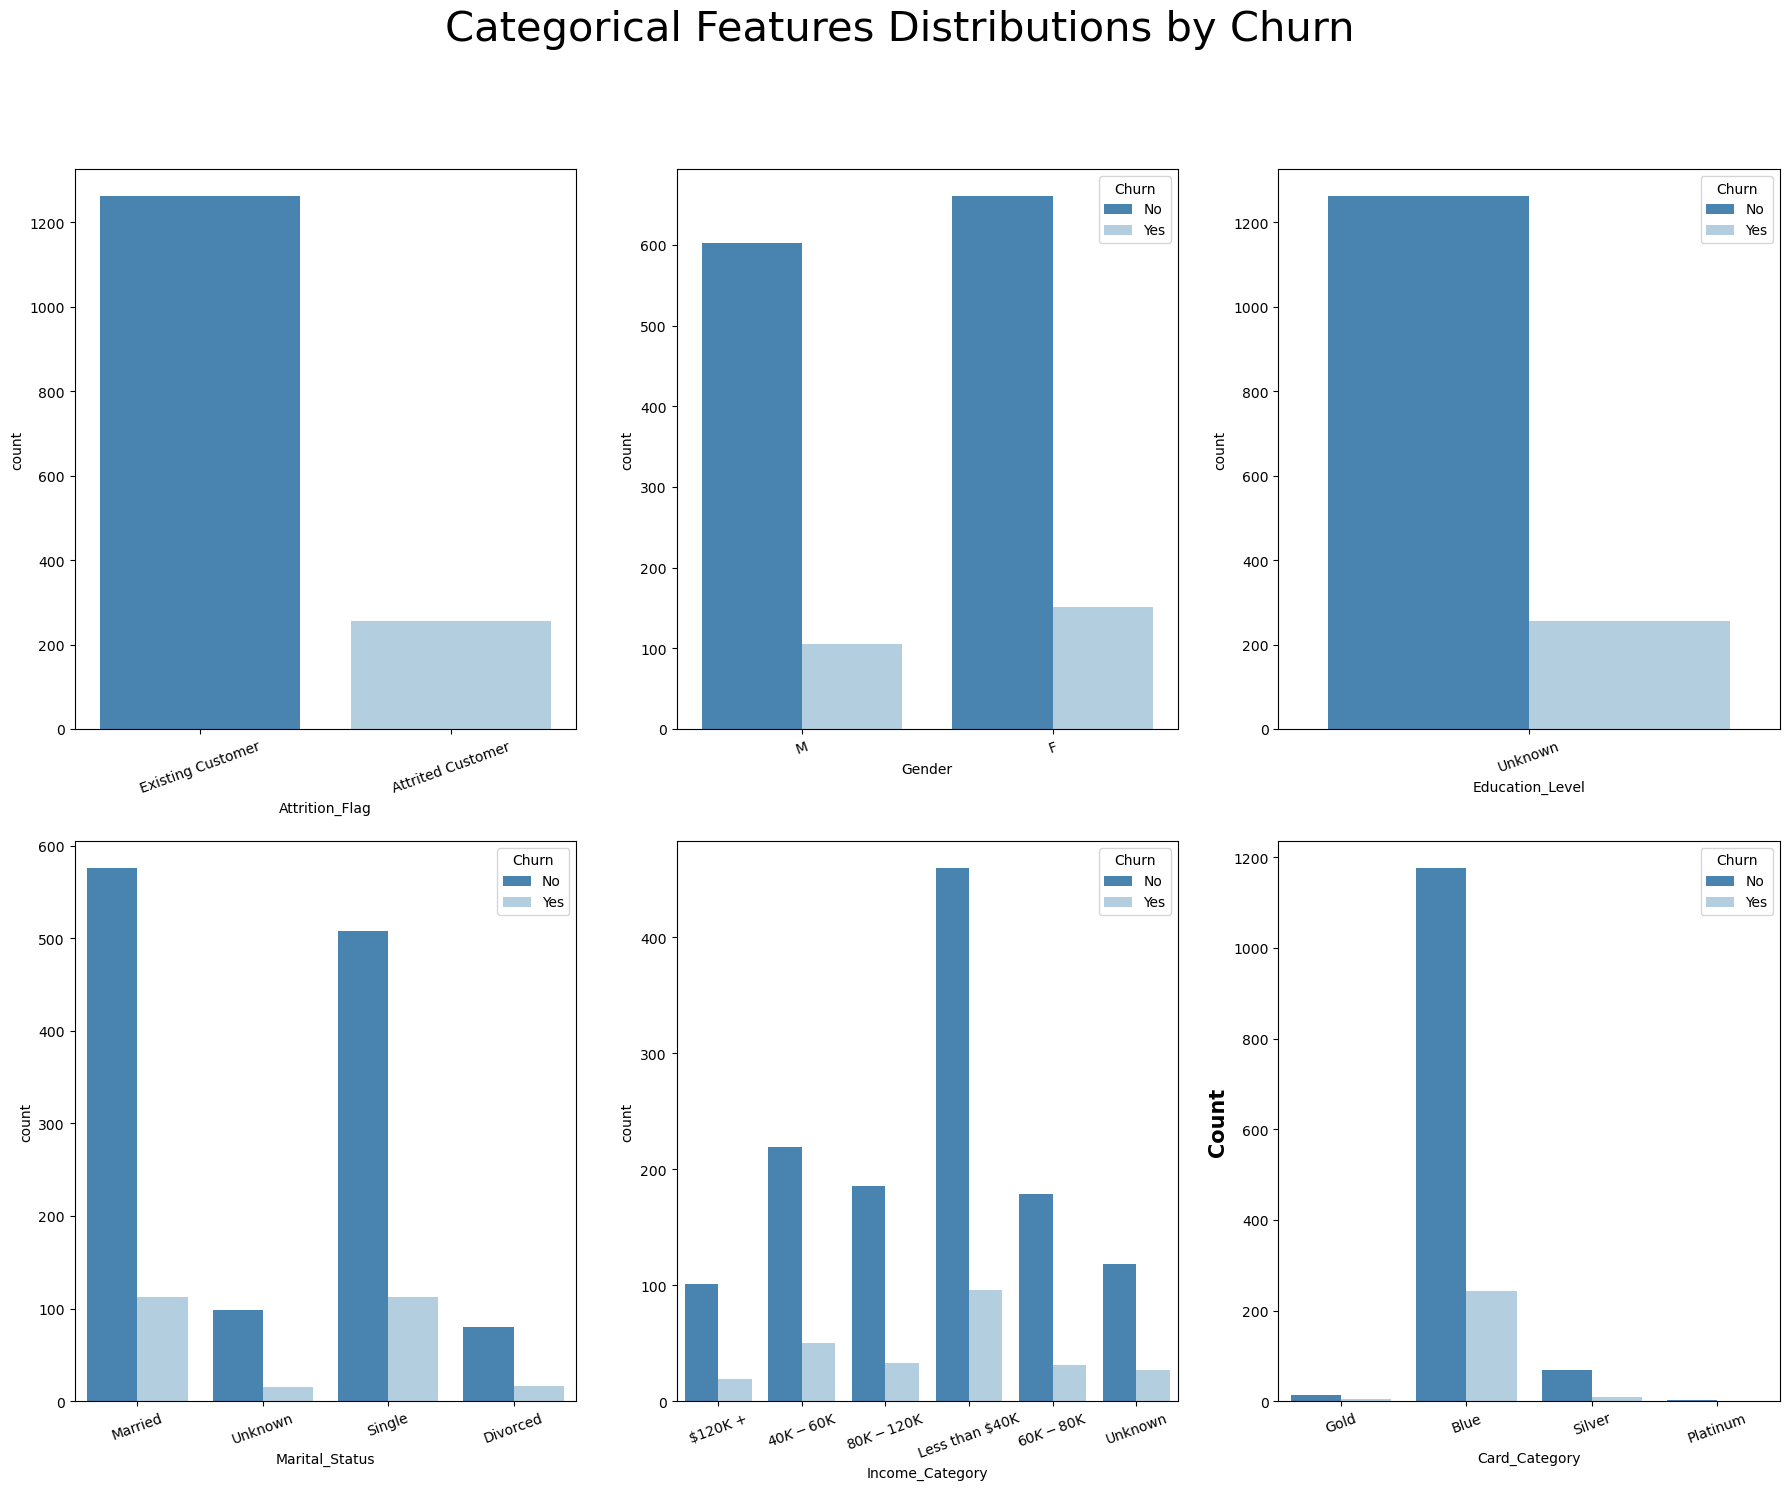

In [109]:
# 含Unknown : Income_Category, Education_Level,  Marital_Status
countplot_categorical(categorical_features, df[df['Education_Level']=='Unknown'])
countplot_churn(categorical_features, df[df['Education_Level']=='Unknown'])

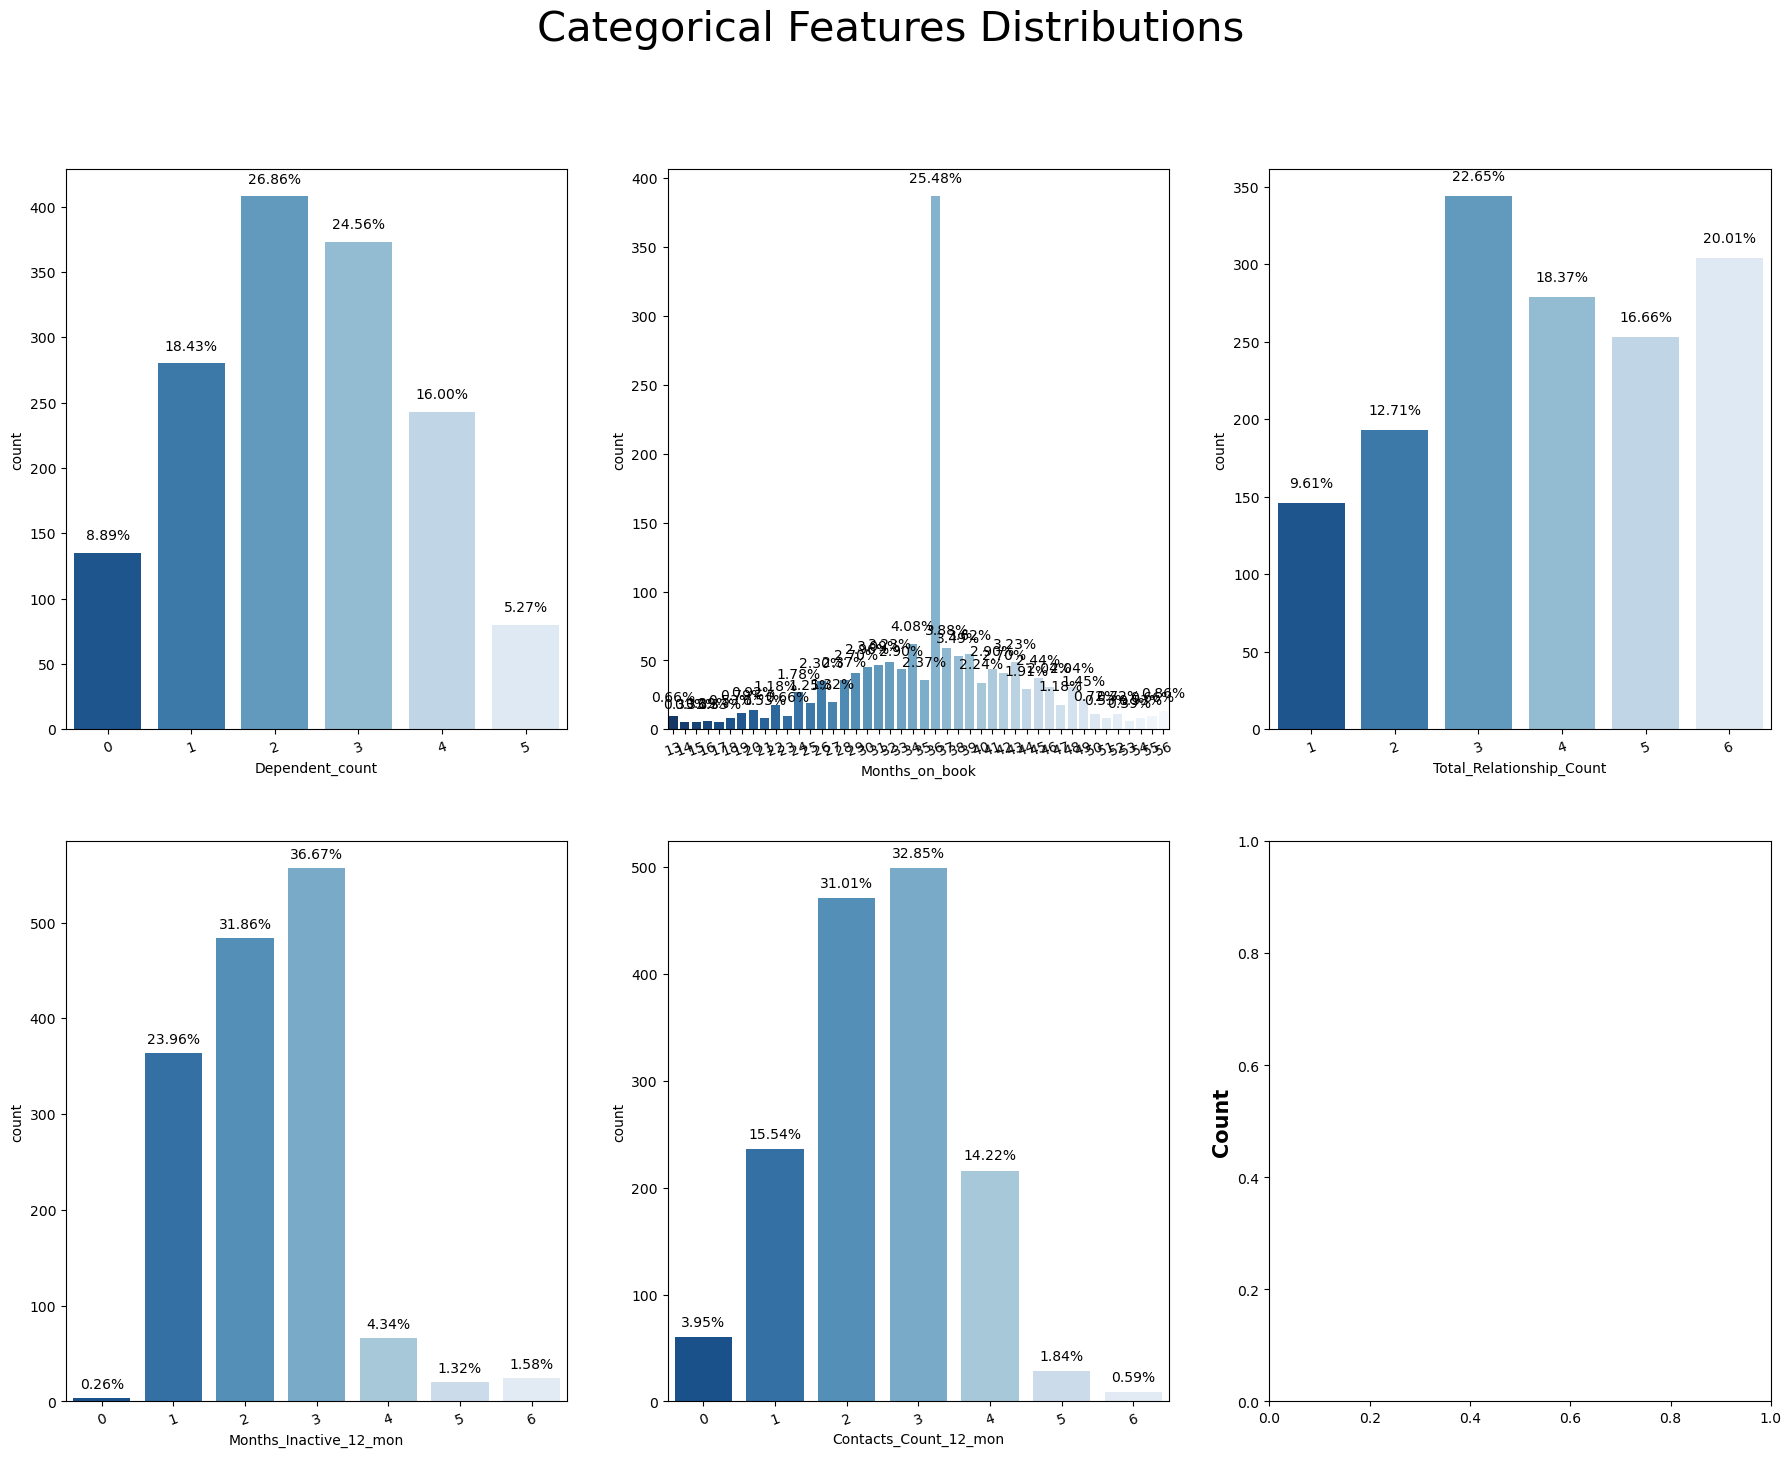

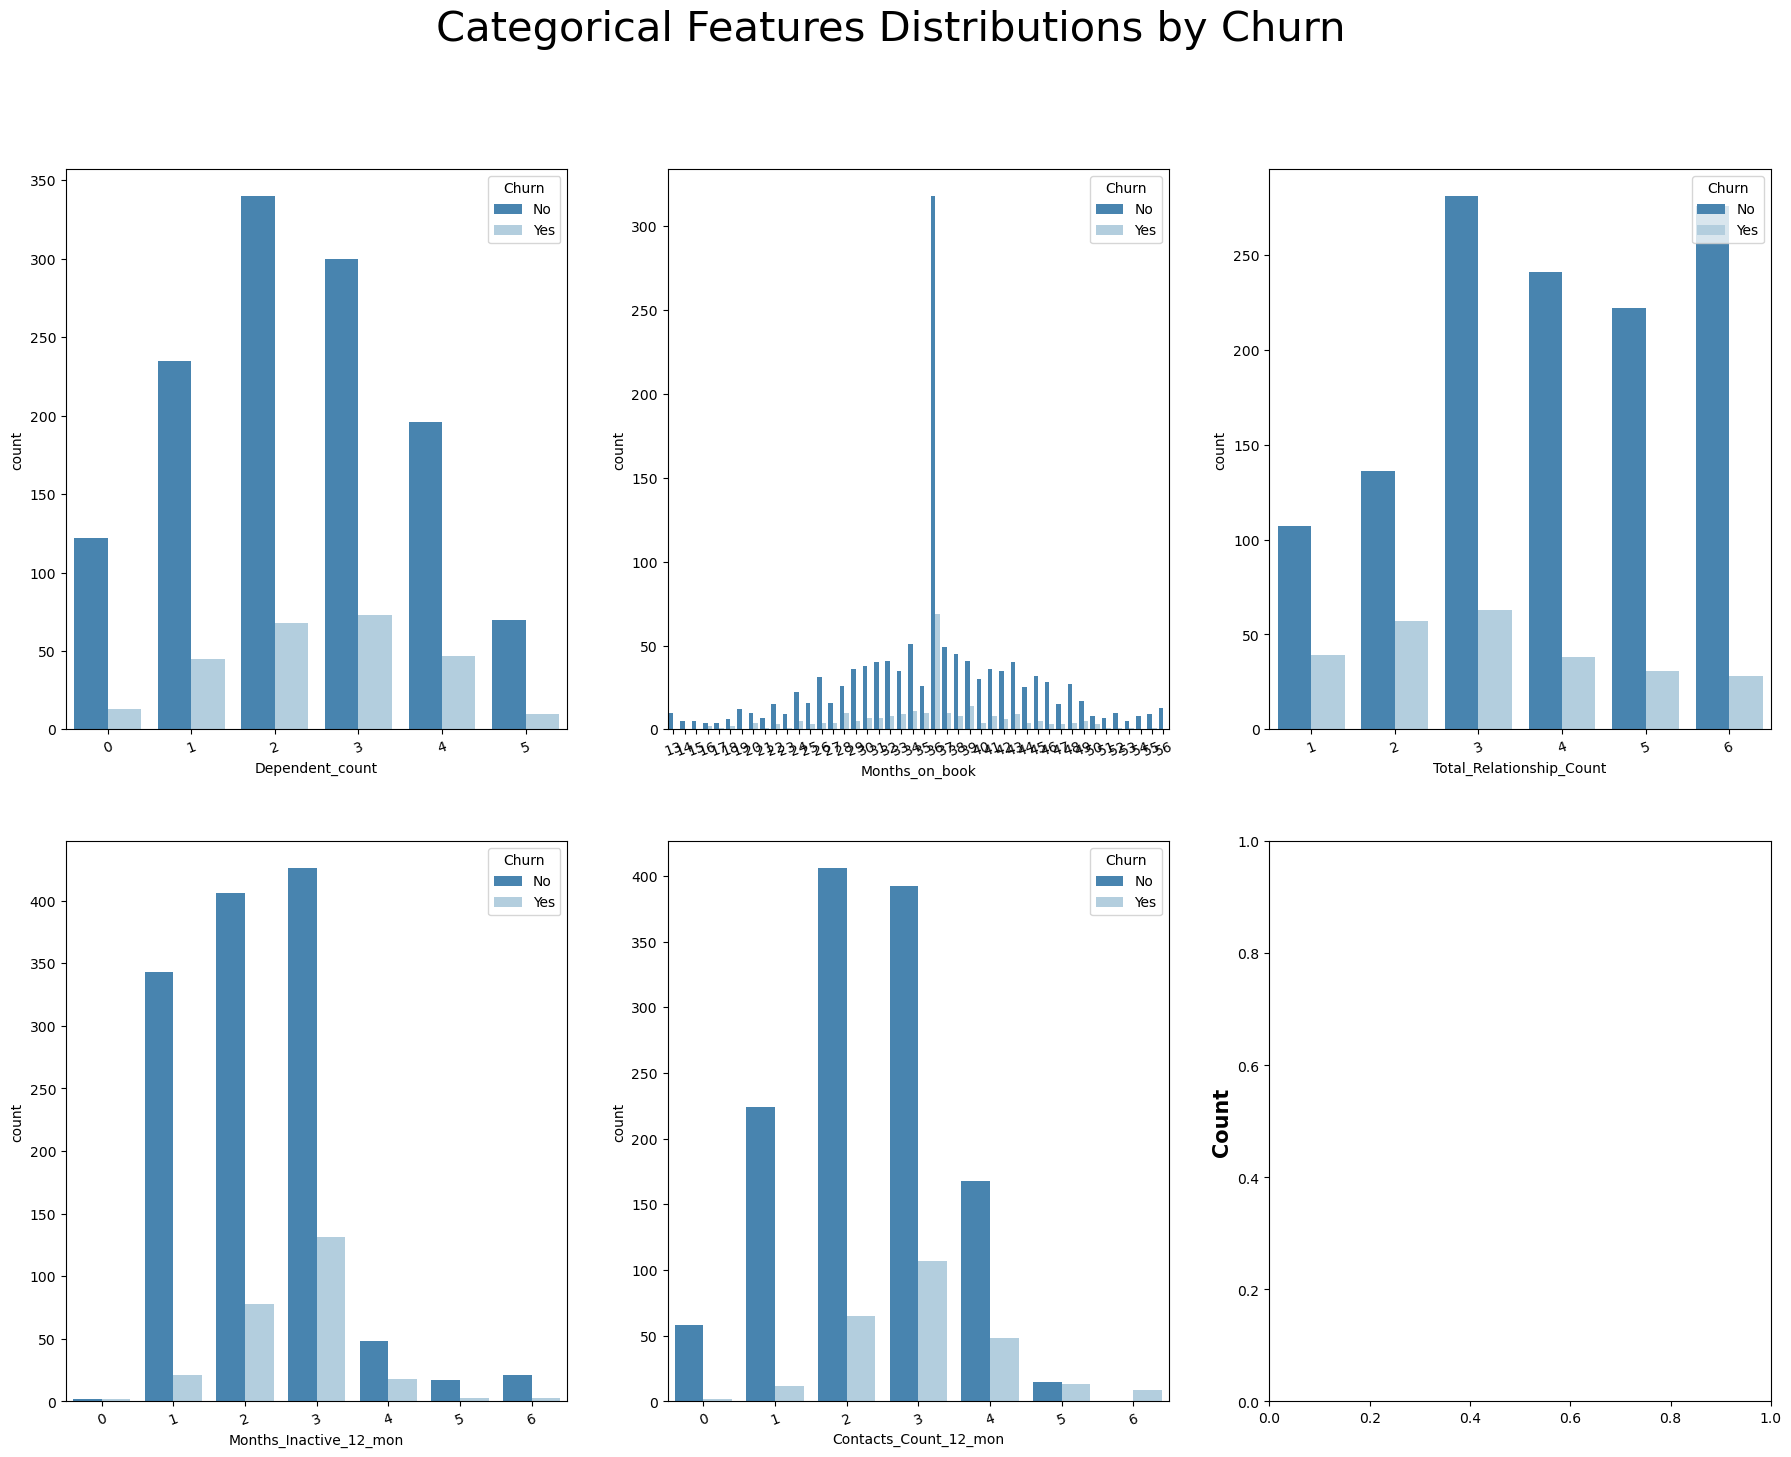

In [116]:
countplot_categorical(e, df[df['Education_Level']=='Unknown'])
countplot_churn(e, df[df['Education_Level']=='Unknown'])

未知'教育水平'資料 觀察到的點:
1. total_relation_count(產品數量) 6個以上的越多

#### 2.2.4.3 Marital_Status

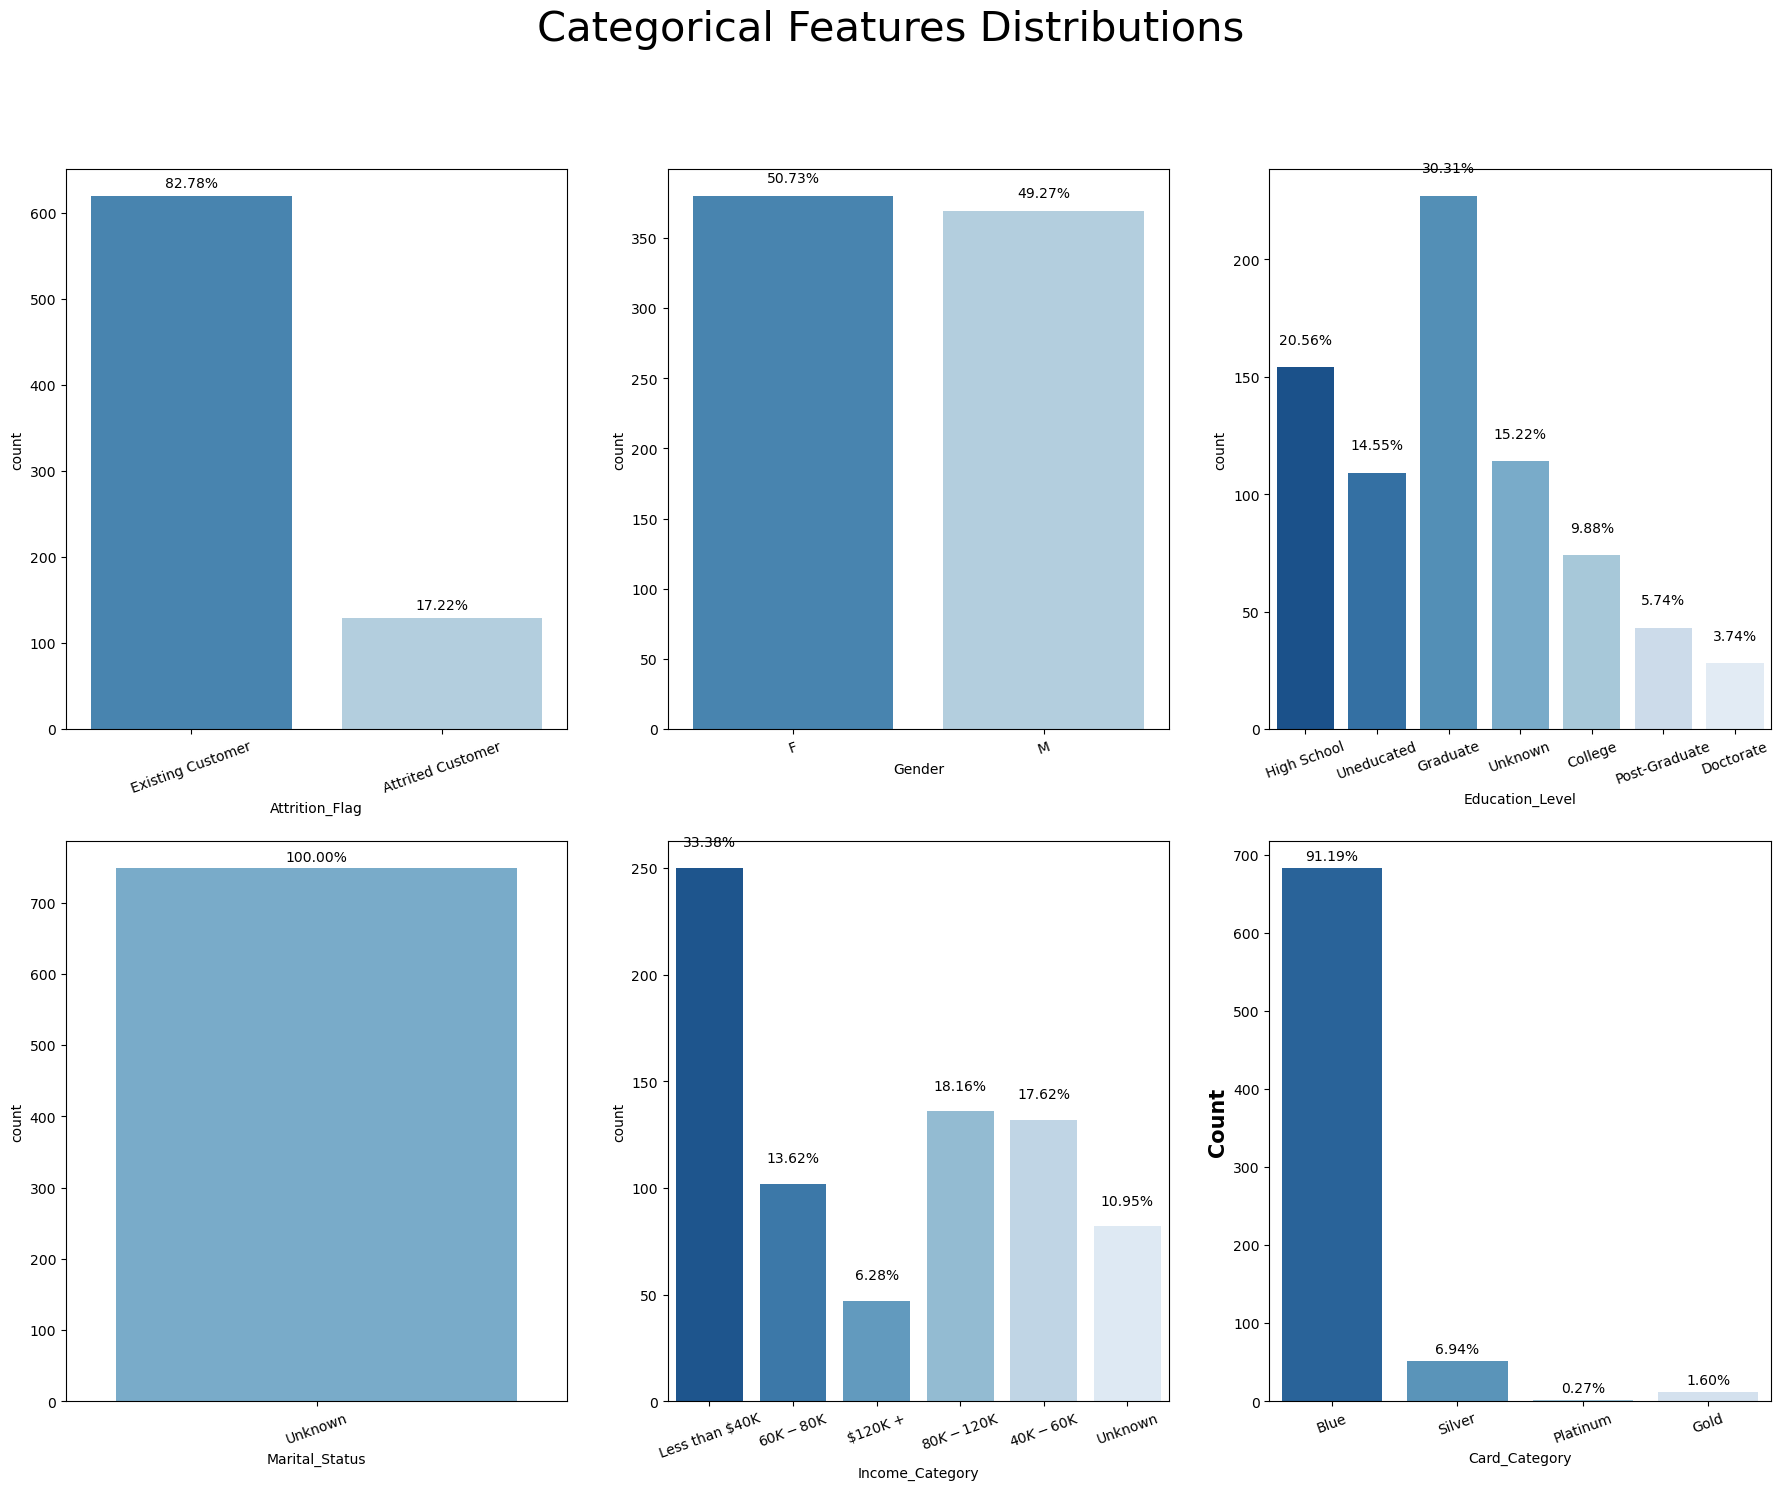

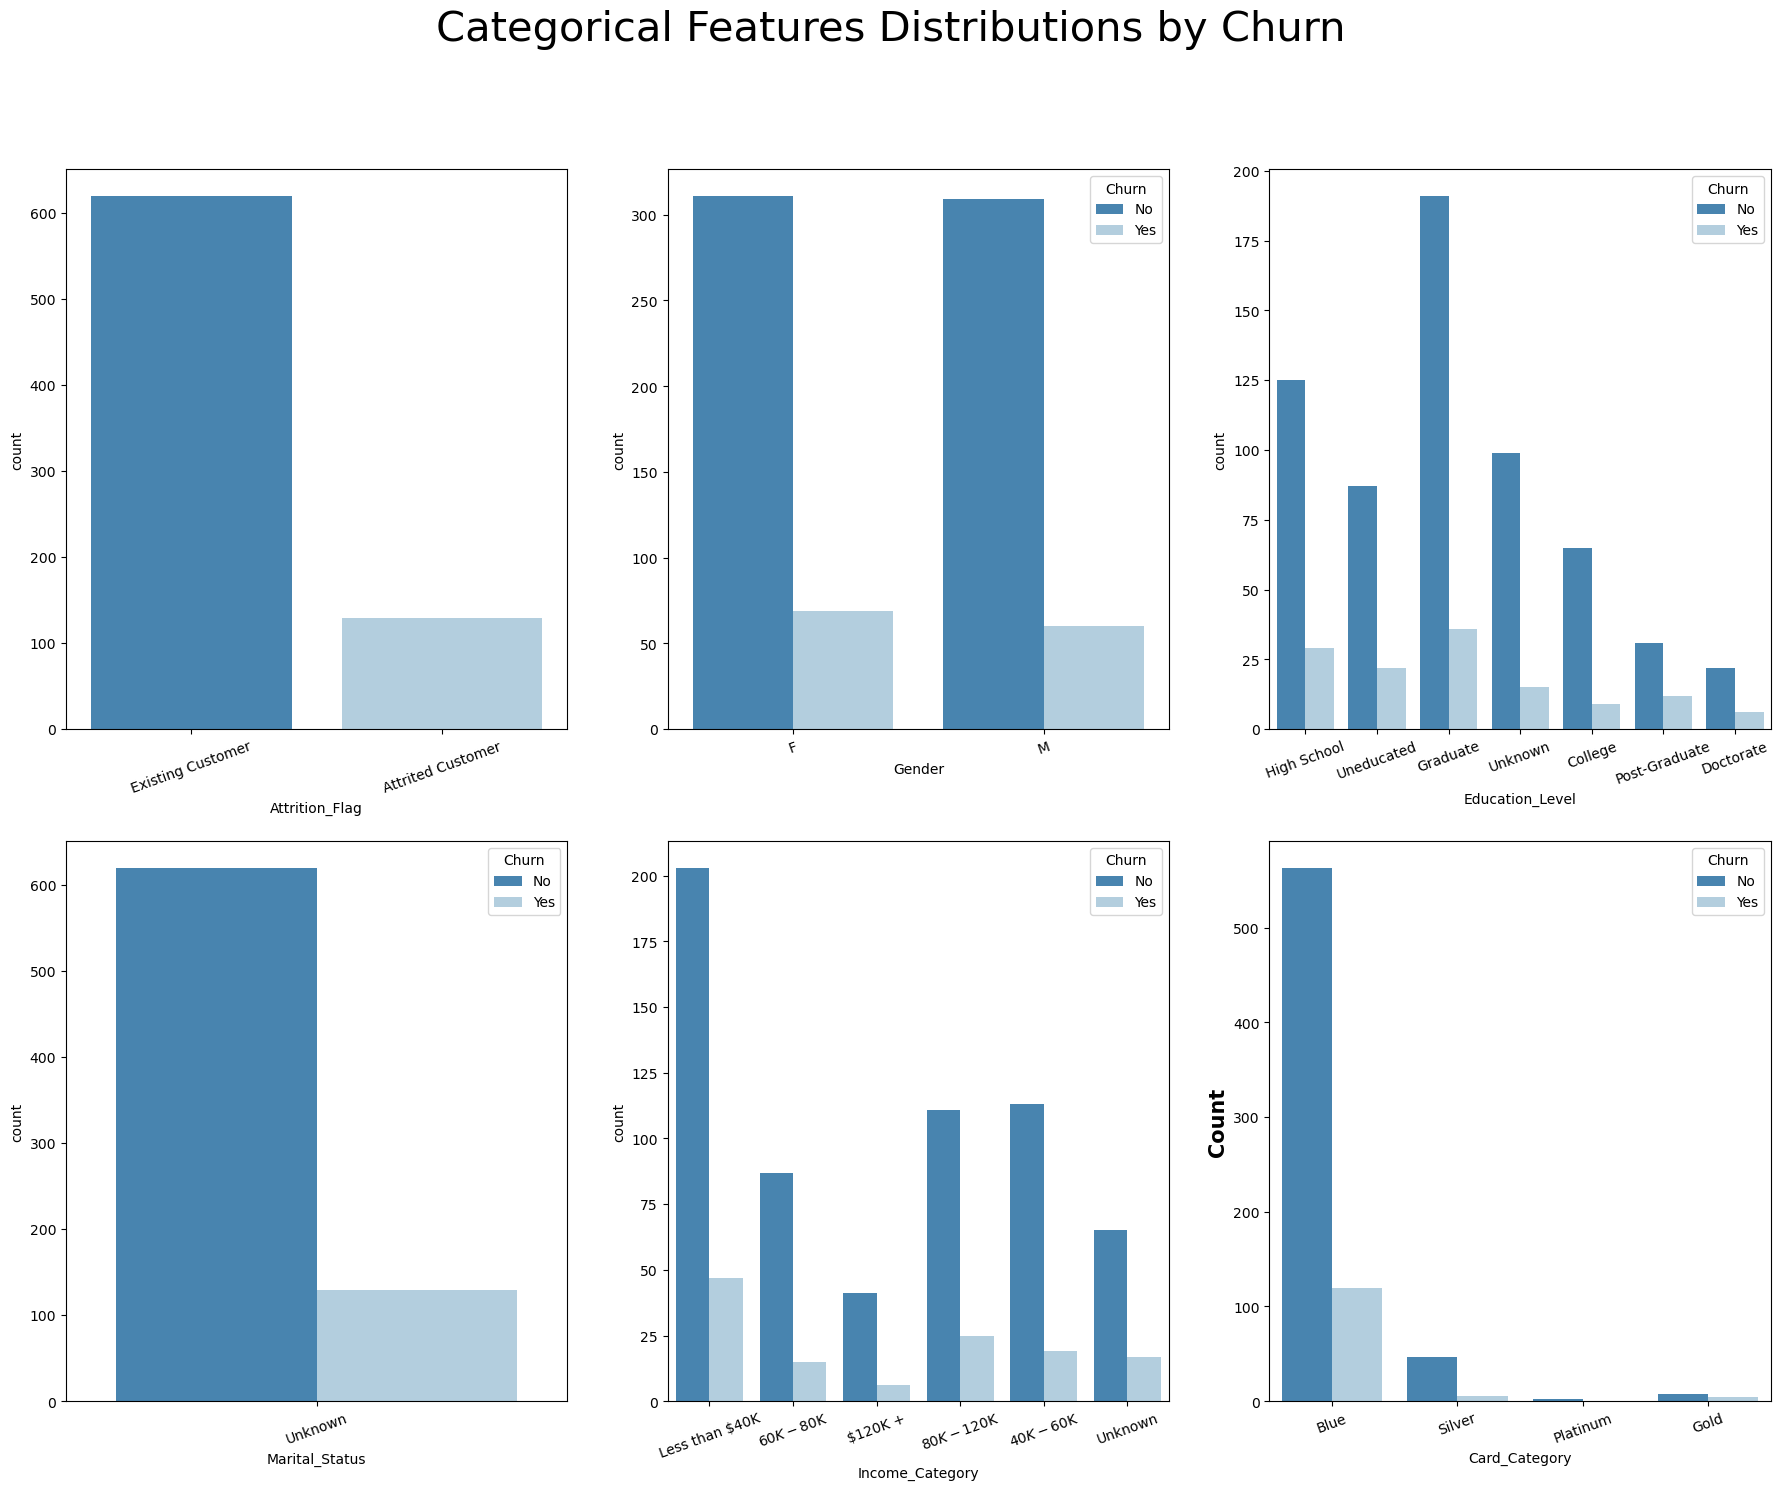

In [110]:
countplot_categorical(categorical_features, df[df['Marital_Status']=='Unknown'])
countplot_churn(categorical_features, df[df['Marital_Status']=='Unknown'])

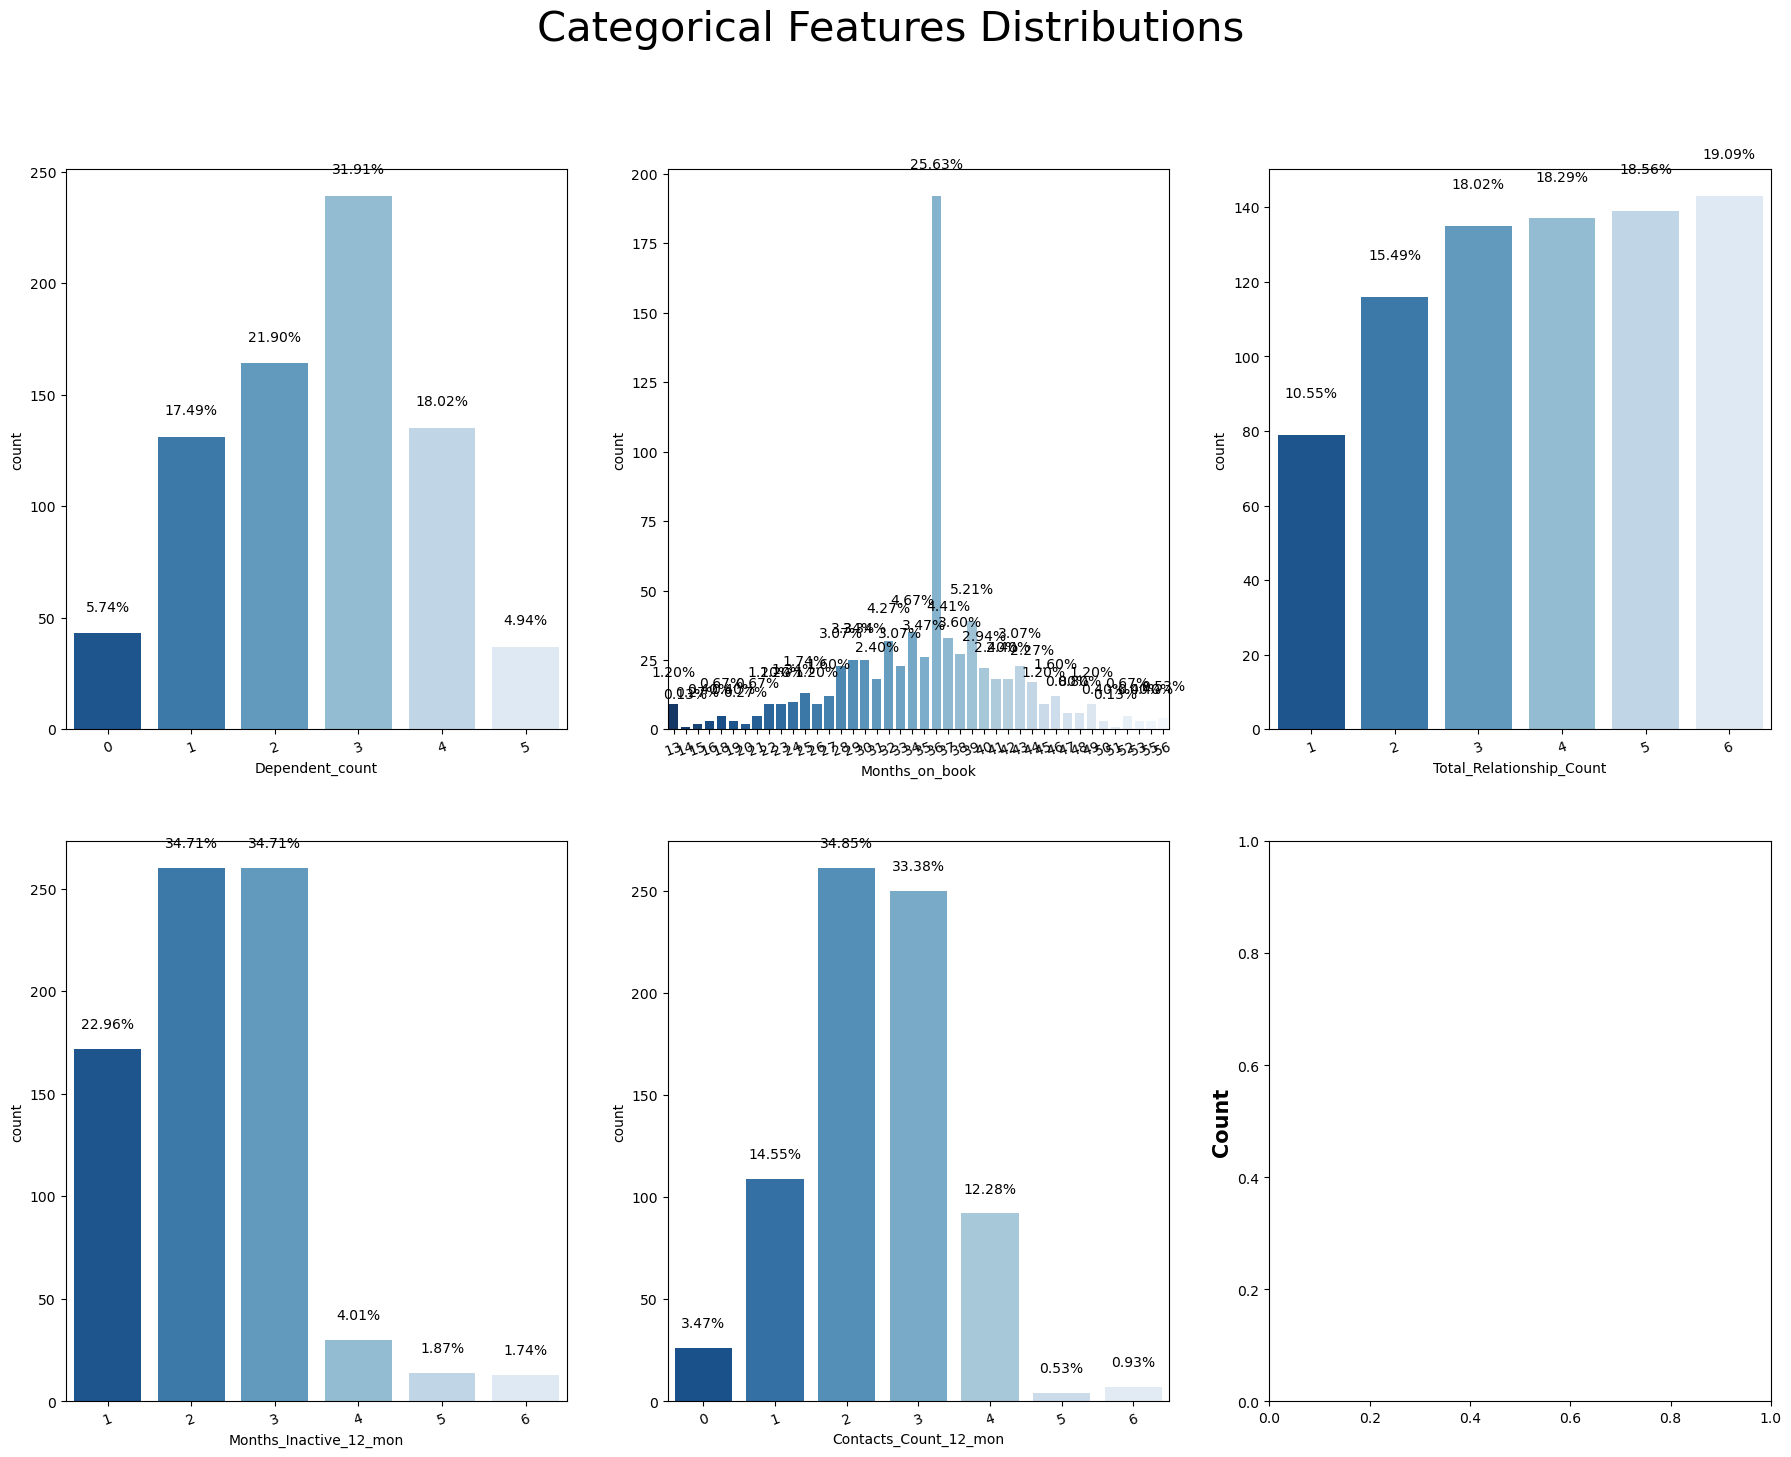

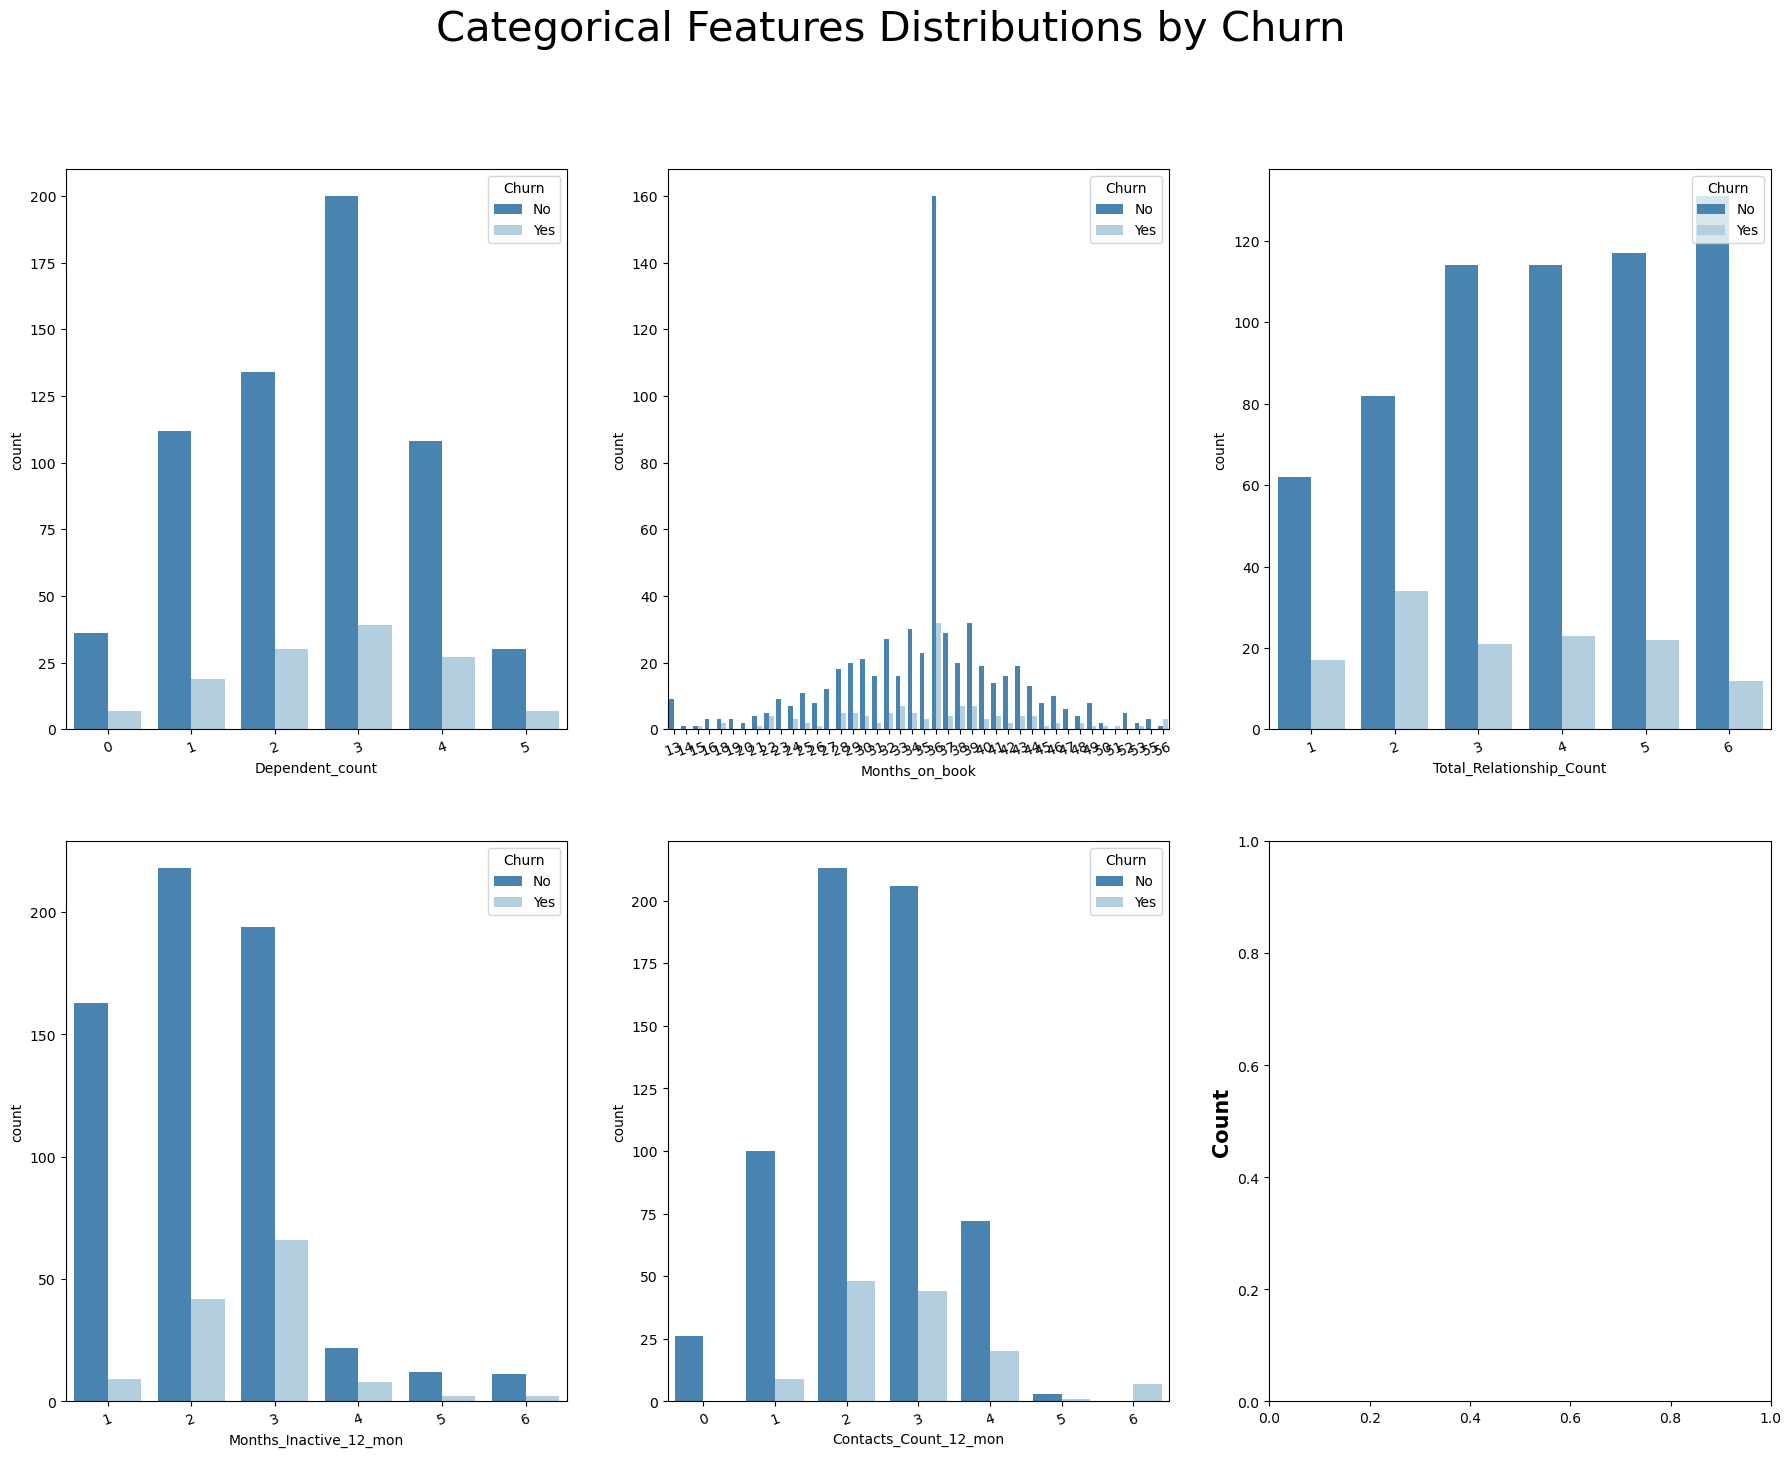

In [117]:
# 數字特徵中的離散特徵 count chart (bar chart)
countplot_categorical(e, df[df['Marital_Status']=='Unknown'])
countplot_churn(e, df[df['Marital_Status']=='Unknown'])

未知'婚姻情況'data 觀察到的點:
1. Depend_count 的數量(3人)以上的越多
2. total_relation_count 擁有產品數 4個以上的 越多


## 2.3 Numerical features  
* 連續型特徵看distribution狀況
*  kde : 把長條圖畫成折線圖！
* 密度圖 (Density Plot) :用於顯示數據在連續時間段內的分佈狀況。這種圖表是直方圖的變種，使用平滑曲線來繪製數值水平，從而得出更平滑的分佈。密度圖的峰值顯示數值在該時間段內最為高度集中的位置。

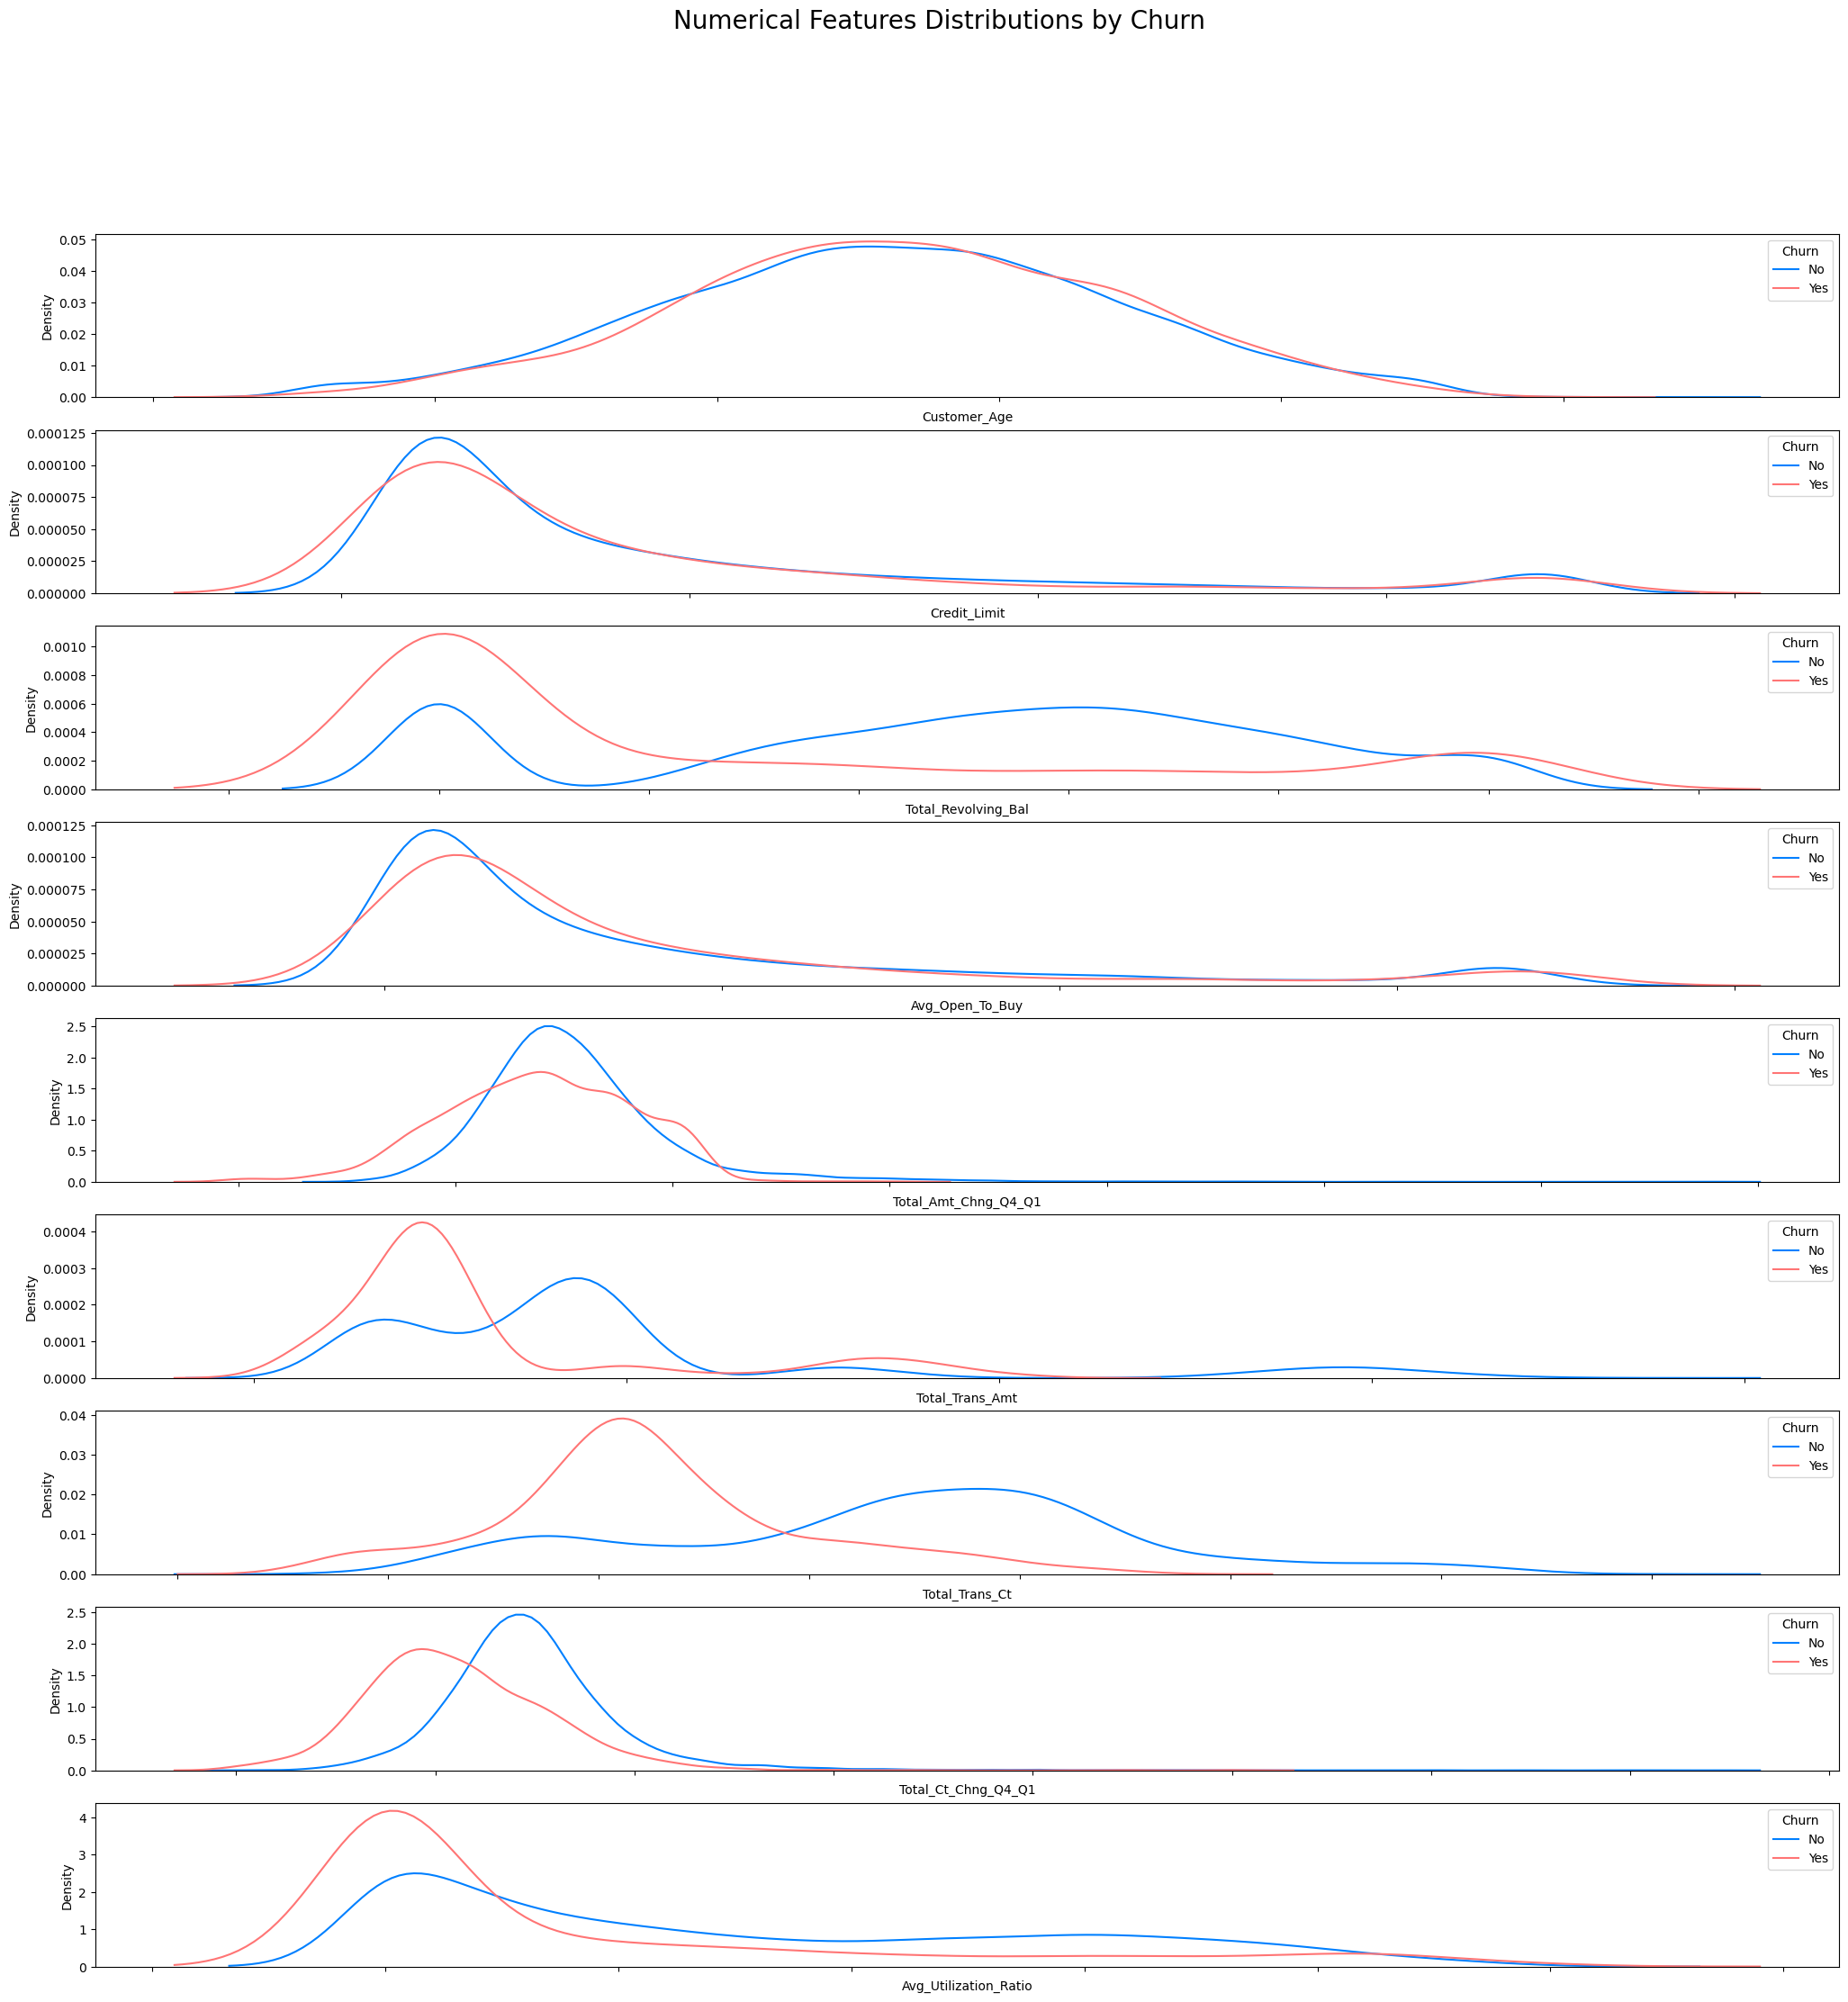

In [89]:
def distplot_churn(nums, data):   
    
    fig, axes = plt.subplots(9, 1, figsize=(25, 25))
    axes = axes.flatten()
    fig.suptitle('Numerical Features Distributions by Churn',fontsize=20)
    
    for ax, num in zip(axes, nums):
        # y 軸是 density
        sns.distplot(data.loc[:, num][(data["Attrition_Flag"] == 'Existing Customer')],hist=False,kde=True,color="#0080FF",ax=ax,label="No")
        sns.distplot(data.loc[:, num][(data["Attrition_Flag"] == 'Attrited Customer') ],hist=False,kde=True,color="#FF7575",ax=ax,label="Yes")
        ax.legend(title='Churn',loc='upper right')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

distplot_churn(num_list, df)

從 流失/未流失 連續型特徵可以觀察出：

1. Total_Revolving_Bal (Balance) (信用卡總周轉餘額) :很明顯，流失客戶的循環餘額低於現有客戶。
2. Total_Trans_Amt (總交易金额（过去12个月）) : 很明顯，與現有客戶相比，流失客戶的交易金額較低。
3. Total_Trans_Ct (總交易數（过去12个月）) : 很明顯，流失客戶的交易次數大多低於現有客戶。
4. Total_Ct_Chng_Q4_Q1 (交易計數變化（第4季度-第1季度）) : 同樣，分佈之間存在明顯差異。 現有客戶的平均值更高
5. Avg_Utilization_Ratio (平均 卡利用率) : 流失客戶的卡利用率較現有客戶低。
6. 分佈狀態無較大差異 : 年齡、信用額度、開放購買信用額度、交易金额變化（第4季度-第1季度）

## 上述小總結 :

很明顯，主要區別在於客戶的“產品變量”。 流失的客戶往往不如現有客戶活躍。 很明顯，最有影響力的參數是與客戶活動相關的特徵。

## 2.4 Numerical correlation with Attrition_Flag

In [15]:
#  Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df['Attrition_Flag'].replace({'Attrited Customer':1,'Existing Customer':0}, inplace=True)

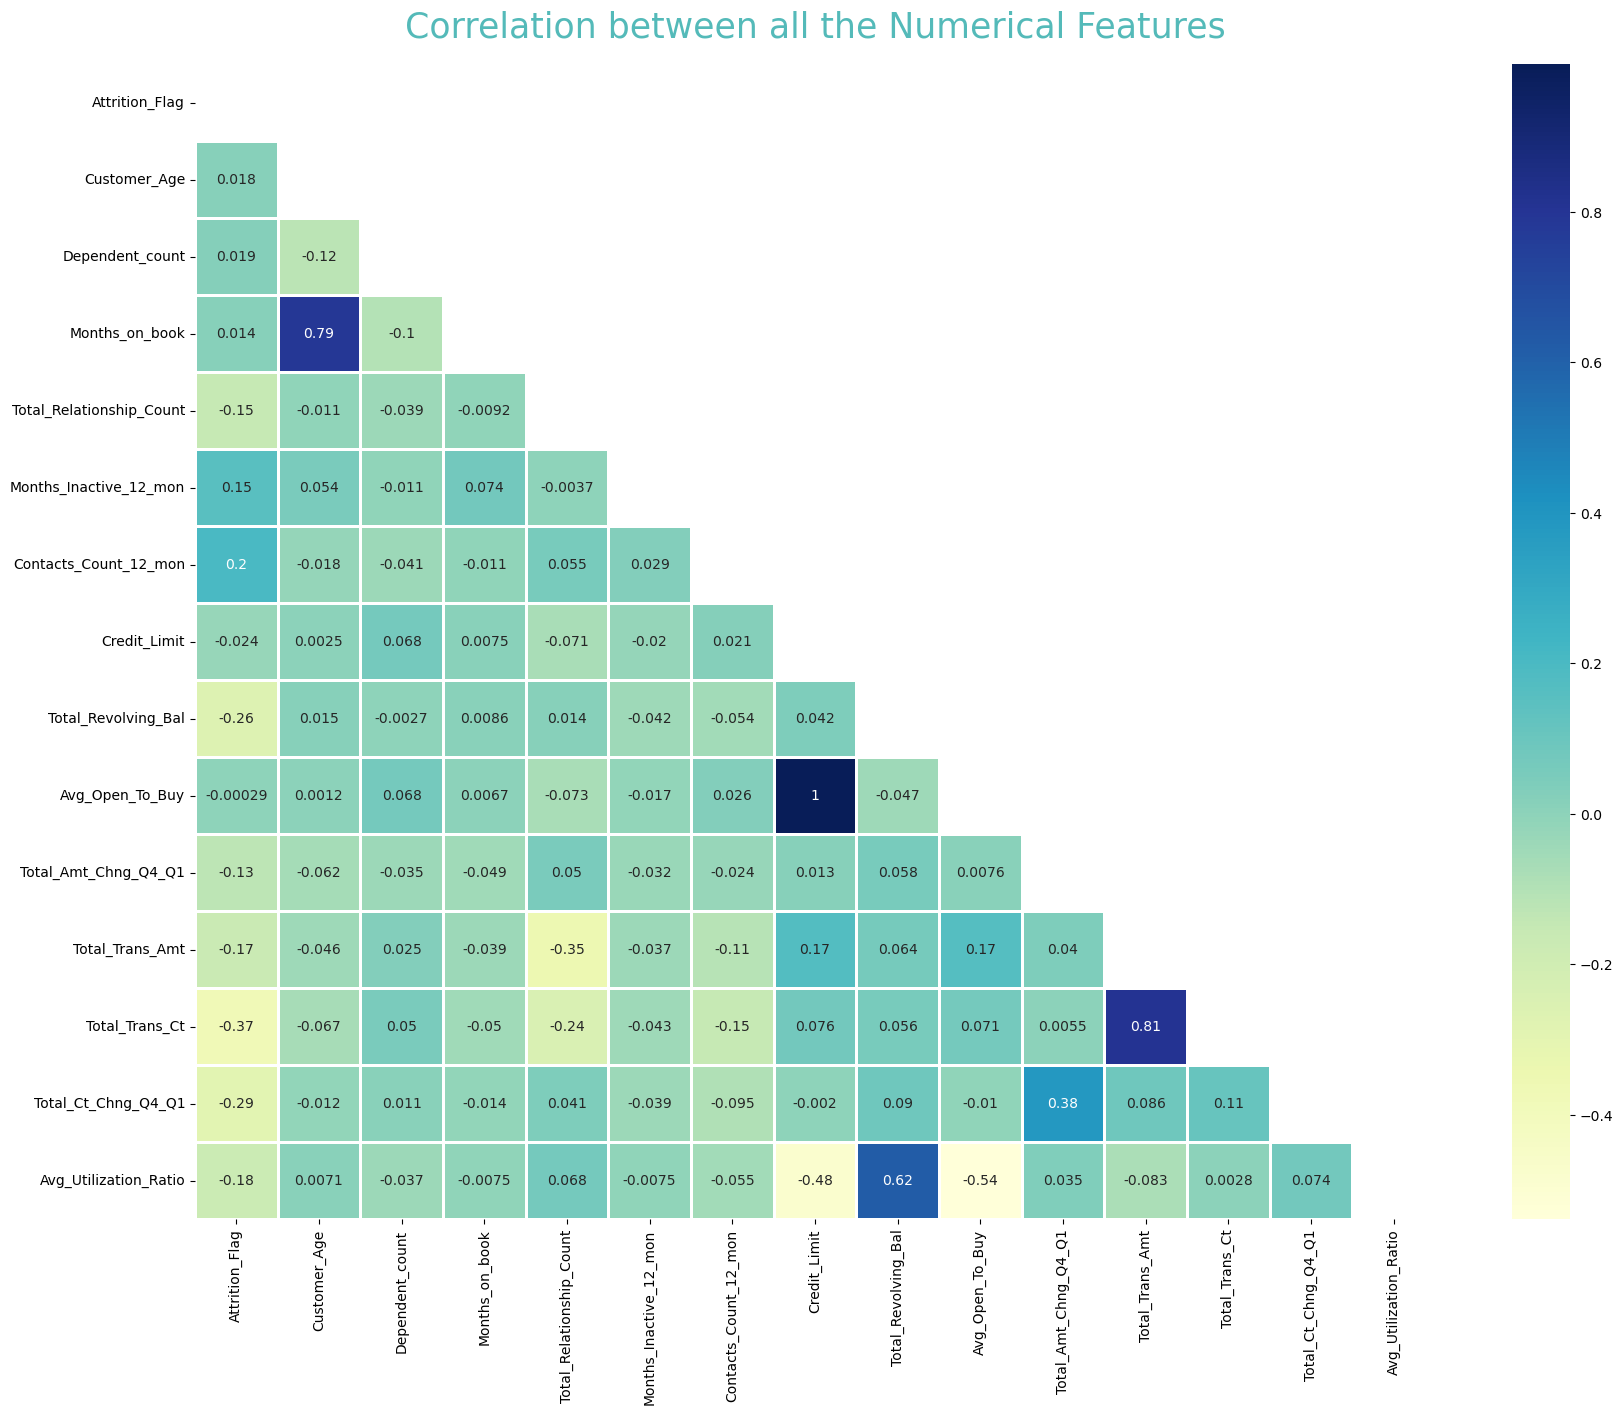

In [16]:
heat = df.corr()
plt.figure(figsize=[20,15])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#54BAB9')
mask = np.triu(np.ones_like(heat, dtype=np.bool)) # 上三角
sns.heatmap(heat, mask=mask, cmap="YlGnBu", annot=True,linewidths=2,linecolor='white') 
# ↑參數可加 vmin=-1, vmax=1 來調整顯示的cor指標大小
plt.show()
#sns.heatmap(df.corr())


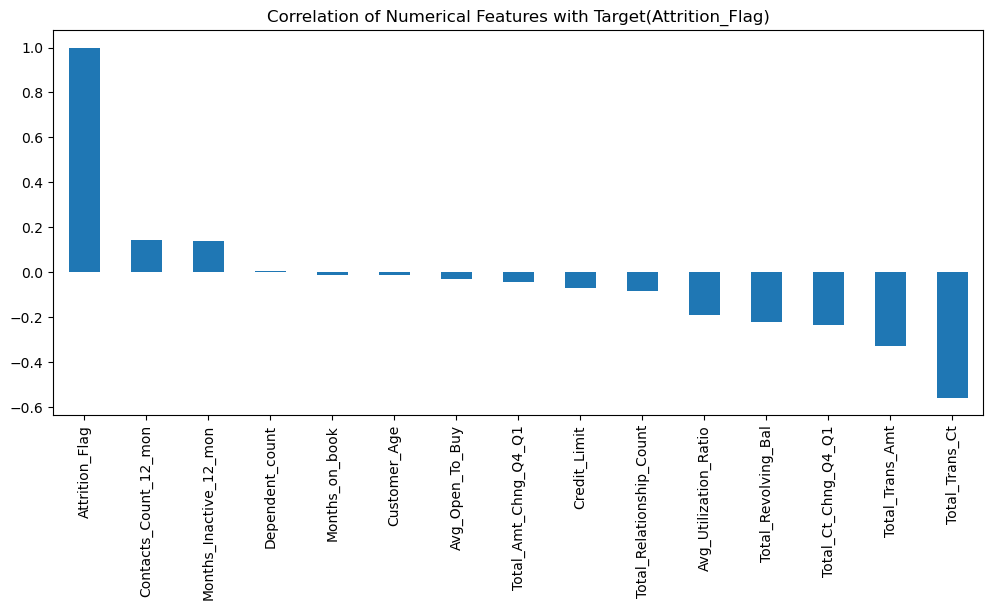

In [122]:
# 查看各 "數據特徵"跟 流失結果 的相關性
plt.figure(figsize=(12,5))
# heat = df.corr()
heat['Attrition_Flag'].sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation of Numerical Features with Target(Attrition_Flag)")
plt.show()

* 可以看到相關性比較強烈的(不管正負)，跟前面EDA 所看到的重要影響有關聯

# 3. Modeling

## 3.1 Feature Encoding

* 有序類別：使用 Label encoding

In [17]:
data = df
# Income_Category, Card_Category, Education_Level 都是有序的
Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4,
    'Unknown'        : 5
}


Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
}


Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
}


data.loc[:, 'Income_Category'] = data['Income_Category'].map(Income_Category_map)
data.loc[:, 'Card_Category'] = data['Card_Category'].map(Card_Category_map)
data.loc[:, 'Education_Level'] = data['Education_Level'].map(Education_Level_map)


* 一般類別資料 (無序)

In [18]:
data = pd.get_dummies(data,columns=['Marital_Status'], drop_first=True)
data['Gender'].replace({'F':1,'M':0}, inplace=True)

# 4. Model

## 3.2 切分資料集

In [19]:
# 特徵 / target 分開
X = data.drop('Attrition_Flag', axis=1)
Y = data['Attrition_Flag']  # 等同 data.Attrition_Flag

# 切分
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, shuffle=True ,random_state=42)

## 3.3 訓練

In [20]:
# 定義 cross validation 的 各種 score 分數
def cv_score(pipe1, pipe2, pipe3, x_train, y_train, cv_n):
    recall_1 = cross_val_score(pipe1, x_train, y_train, cv=cv_n, scoring='recall').mean()
    recall_2 = cross_val_score(pipe2, x_train, y_train, cv=cv_n, scoring='recall').mean()
    recall_3 = cross_val_score(pipe3, x_train, y_train, cv=cv_n, scoring='recall').mean()

    precision_1 = cross_val_score(pipe1, x_train, y_train, cv=cv_n, scoring='precision').mean()
    precision_2 = cross_val_score(pipe2, x_train, y_train, cv=cv_n, scoring='precision').mean()
    precision_3 = cross_val_score(pipe3, x_train, y_train, cv=cv_n, scoring='precision').mean()

    f1_1 = cross_val_score(pipe1, x_train, y_train, cv=cv_n, scoring='f1').mean()
    f1_2 = cross_val_score(pipe2, x_train, y_train, cv=cv_n, scoring='f1').mean()
    f1_3 = cross_val_score(pipe3, x_train, y_train, cv=cv_n, scoring='f1').mean()

    auc_1 = cross_val_score(pipe1, x_train, y_train, cv=cv_n, scoring='roc_auc').mean()
    auc_2 = cross_val_score(pipe2, x_train, y_train, cv=cv_n, scoring='roc_auc').mean()
    auc_3 = cross_val_score(pipe3, x_train, y_train, cv=cv_n, scoring='roc_auc').mean()

    accuracy_1 = cross_val_score(pipe1, x_train, y_train, cv=cv_n, scoring='accuracy').mean()
    accuracy_2 = cross_val_score(pipe2, x_train, y_train, cv=cv_n, scoring='accuracy').mean()
    accuracy_3 = cross_val_score(pipe3, x_train, y_train, cv=cv_n, scoring='accuracy').mean()

    print('Mean Recall scores:')
    print('LogisticRegression :',recall_1)
    print('Random Forest :',recall_2)
    print('XGBoost :', recall_3)
    print('')
    print('-'*70)
    print('')
    print('Mean Precision scores:')
    print('LogisticRegression :', precision_1)
    print('Random Forest :', precision_2)
    print('XGBoost :', precision_3)
    print('')
    print('-'*70)
    print('')
    print('Mean F1 scores:')
    print('LogisticRegression :',f1_1)
    print('Random Forest :',f1_2)
    print('XGBoost :', f1_3)
    print('-'*70)
    print('')
    print('Mean Roc_Auc scores:')
    print('LogisticRegression :', auc_1)
    print('Random Forest :', auc_2)
    print('XGBoost :', auc_3)
    print('-'*70)
    print('')
    print('Mean Accuracy scores:')
    print('LogisticRegression :', accuracy_1)
    print('Random Forest :',accuracy_2)
    print('XGBoost :', accuracy_3)

## 3.2 Encoding 後的 correlation

### 3.3.1 Basic

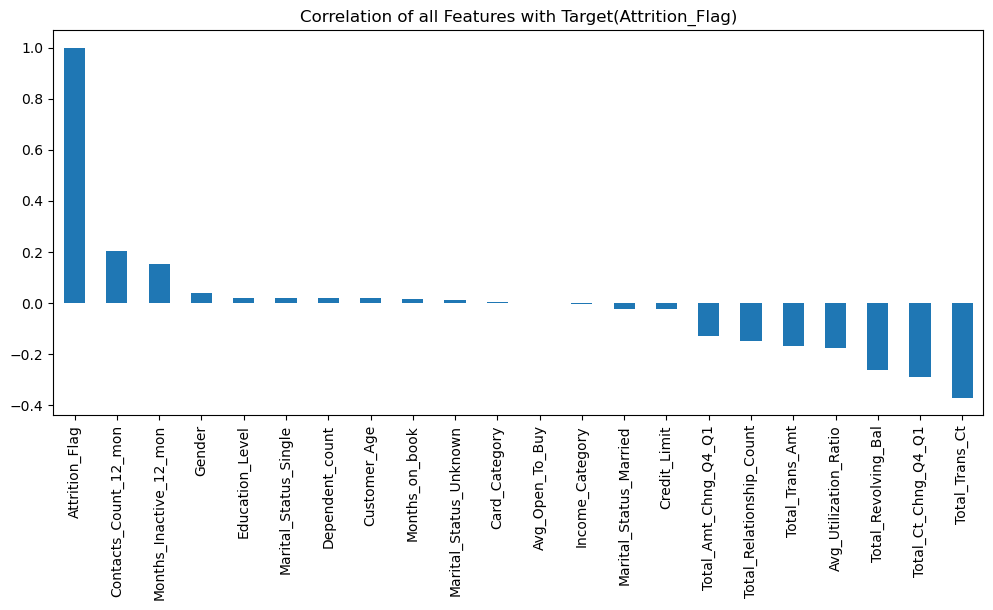

In [293]:
# 查看各特徵跟流失結果的相關性
plt.figure(figsize=(12,5))
# heat = data.corr()
heat['Attrition_Flag'].sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation of all Features with Target(Attrition_Flag)")
plt.show()

In [21]:
lr_pipe = make_pipeline(StandardScaler() , LogisticRegression(random_state=42))
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
XGB_pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=42))

In [141]:
cv_score(lr_pipe, rf_pipe, XGB_pipe, x_train, y_train, cv_n=5)

Mean Recall scores:
LogisticRegression : 0.5829826112584733
Random Forest : 0.8072119068670792
XGBoost : 0.881721190686708

----------------------------------------------------------------------

Mean Precision scores:
LogisticRegression : 0.7646622905313787
Random Forest : 0.9253604286900753
XGBoost : 0.9259696801891861

----------------------------------------------------------------------

Mean F1 scores:
LogisticRegression : 0.661015362288482
Random Forest : 0.8621827223854848
XGBoost : 0.9031831617903936
----------------------------------------------------------------------

Mean Roc_Auc scores:
LogisticRegression : 0.9248604715257327
Random Forest : 0.9883987493055262
XGBoost : 0.9927272973749114
----------------------------------------------------------------------

Mean Accuracy scores:
LogisticRegression : 0.9040862598152337
Random Forest : 0.9585236212976292
XGBoost : 0.9696335899955066


### 4.2.2 Basic + Smote

In [23]:
lr_sm_pipe = make_pipeline(StandardScaler(), SMOTE(random_state=42), LogisticRegression(random_state=42))
rf_sm_pipe = make_pipeline(StandardScaler(),  SMOTE(random_state=42), RandomForestClassifier(random_state=42))
XGB_sm_pipe = make_pipeline(StandardScaler(),  SMOTE(random_state=42), XGBClassifier(random_state=42))

In [144]:
cv_score(lr_sm_pipe, rf_sm_pipe, XGB_sm_pipe, x_train, y_train, cv_n=5)

Mean Recall scores:
LogisticRegression : 0.8425758915414088
Random Forest : 0.8724786324786326
XGBoost : 0.9016917182434423

----------------------------------------------------------------------

Mean Precision scores:
LogisticRegression : 0.528648633533005
Random Forest : 0.8771275737218807
XGBoost : 0.908867364338041

----------------------------------------------------------------------

Mean F1 scores:
LogisticRegression : 0.6496063579745988
Random Forest : 0.8747638792085478
XGBoost : 0.9051652325323494
----------------------------------------------------------------------

Mean Roc_Auc scores:
LogisticRegression : 0.9254899269811702
Random Forest : 0.987700125889992
XGBoost : 0.9919785806151437
----------------------------------------------------------------------

Mean Accuracy scores:
LogisticRegression : 0.8539695051827481
Random Forest : 0.9598811128628114
XGBoost : 0.9696338184781533


* 評估指標應該是 recall，把隱藏危機客戶抓出來制定方針，就算precision(實際為1/預測為1)下降一點沒關係，因為 其意思是 多放一些實際為0的到預測1這，也會更鞏固顧客不流失。

### 4.2.3 Basic + Smote + Gridsearch/RandomSearch

* Gridsearch

In [168]:
RF_params = {'randomforestclassifier__n_estimators':[ 50, 100, 200, 300],
            'randomforestclassifier__max_depth':[5,8,10,15],
            #'randomforestclassifier__max_features':[5,10,15],
            #'randomforestclassifier__min_samples_split' : [100, 110, 200],
            #'randomforestclassifier__min_samples_leaf' : [30, 40, 60],
            'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']
            }



RF_grid = GridSearchCV(rf_sm_pipe, param_grid=RF_params, cv=5, scoring='recall', refit=True)

# train
RF_grid.fit(x_train,y_train)

# 输出最優超参数
print("Best parameters of RandomForest: {}".format(RF_grid.best_params_))
print('-'*70)
# 输出最優 score (Recall)
print("Best recall score of RandomForest: {}".format(RF_grid.best_score_))


Best parameters of RandomForeast: {'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 300}
----------------------------------------------------------------------
Best recall score of RandomForeast: 0.8955437665782494


In [154]:
XGB_params = {
    "xgbclassifier__colsample_bytree": [0.670, 0.680, 0.690],
    "xgbclassifier__min_child_weight": [1],
    "xgbclassifier__learning_rate": [0.275, 0.3, 0.325], # default 0.1 
    "xgbclassifier__max_depth": [7,8,9], # default 3
    "xgbclassifier__n_estimators": [212, 215, 217], # default 100
    "xgbclassifier__subsample": [0.75, 0.80, 0.85]
}

XGB_grid =  GridSearchCV(XGB_sm_pipe, param_grid=XGB_params, cv=5, scoring='recall', refit=True)

# train
XGB_grid.fit(x_train,y_train)

# 输出最優超参数
print("Best parameters of XGB: {}".format(XGB_grid.best_params_))
print('-'*70)
# 输出最優 score (Recall)
print("Best recall score of XGB: {}".format(XGB_grid.best_score_))


Best parameters of XGB: {'xgbclassifier__colsample_bytree': 0.67, 'xgbclassifier__learning_rate': 0.275, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 215, 'xgbclassifier__subsample': 0.85}
----------------------------------------------------------------------
Best recall score of XGB: 0.9109048040082524


# 4. Evaluation on Test data

## 4.1 Evaluation

### 4.1.1 Basic

In [174]:
# fit
rf_pipe.fit(x_train, y_train)
# predict
rf_pred_basic = rf_pipe.predict(x_test)
# consult
print('RF')
print ('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred_basic))
print(classification_report(y_test, rf_pred_basic))
print("AUC:", roc_auc_score(y_test,rf_pred_basic))


print('')
print('-'*70)
print('')
print('XGB ')
print ('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_pred_basic))
print(classification_report(y_test, xgb_pred_basic))
print("AUC:", roc_auc_score(y_test, xgb_pred_basic))

RF
Confusion Matrix:
[[1683   18]
 [  73  252]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.95      0.96      0.95      2026

AUC: 0.8824013024013024

----------------------------------------------------------------------

XGB 
Confusion Matrix:
[[1680   21]
 [  45  280]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.86      0.89       325

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026

AUC: 0.9245963912630579


### 4.1.2  Basic + SMOTE

RF
Confusion Matrix:
[[1659   42]
 [  55  270]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1701
           1       0.87      0.83      0.85       325

    accuracy                           0.95      2026
   macro avg       0.92      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026

AUC: 0.9030389363722697


<Figure size 1200x800 with 0 Axes>

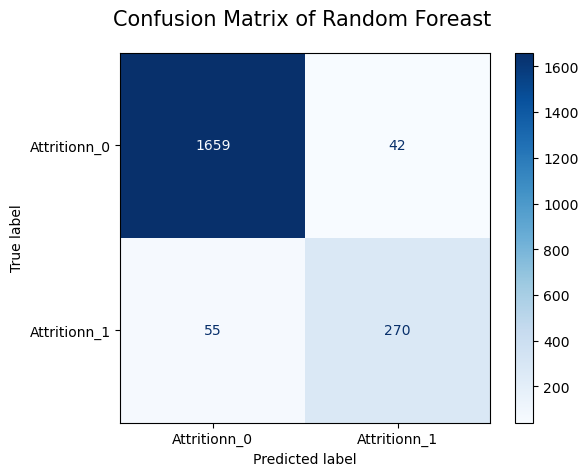


----------------------------------------------------------------------

XGB 
Confusion Matrix:
[[1677   24]
 [  42  283]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.87      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

AUC: 0.928329941663275


In [186]:
# fit
rf_sm_pipe.fit(x_train, y_train)
XGB_sm_pipe.fit(x_train, y_train)
#predict
rf_pred = rf_sm_pipe.predict(x_test)
xgb_pred = XGB_sm_pipe.predict(x_test)
#consult
print('RF')
print ('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("AUC:", roc_auc_score(y_test,rf_pred))

# RF's Confusion Matrix plot
plt.figure(figsize=[12,8])
ConfusionMatrixDisplay.from_estimator()
plot_confusion_matrix(RF_grid,
                      x_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.title("Confusion Matrix of Random Forest ", size=15, pad=20)

plt.grid(False)
plt.show()


print('')
print('-'*70)
print('')
print('XGB ')
print ('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("AUC:", roc_auc_score(y_test, xgb_pred))


### 4.1.3  Basic + SMOTE + Gridsearch


Gridsearch RF 
Confusion Matrix:
[[1621   80]
 [  46  279]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1701
           1       0.78      0.86      0.82       325

    accuracy                           0.94      2026
   macro avg       0.87      0.91      0.89      2026
weighted avg       0.94      0.94      0.94      2026

AUC: 0.9057151901596348


<Figure size 1200x800 with 0 Axes>

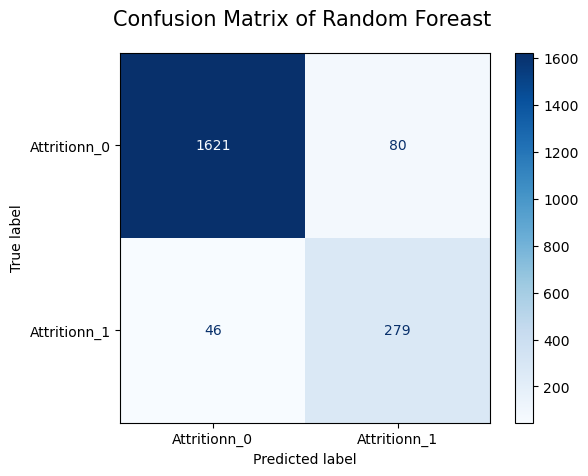


----------------------------------------------------------------------

Gridsearch XGB 
Confusion Matrix:
[[1679   22]
 [  43  282]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.87      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

AUC: 0.9273793696015917


In [189]:
# prediction
RF_grid_pred = RF_grid.predict(x_test)
XGB_grid_pred = XGB_grid.predict(x_test)
#consult
print('')
print('Gridsearch RF ')
print('Confusion Matrix:')
print(confusion_matrix(y_test, RF_grid_pred))
print(classification_report(y_test, RF_grid_pred))
print("AUC:", roc_auc_score(y_test, RF_grid_pred))

# RF's Confusion Matrix plot
plt.figure(figsize=[12,8])
ConfusionMatrixDisplay.from_estimator()
plot_confusion_matrix(RF_grid,
                      x_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attritionn_0','Attritionn_1'])
plt.title("Confusion Matrix of Random Forest ", size=15, pad=20)

plt.grid(False)
plt.show()

print('')
print('-'*70)
print('')
print('Gridsearch XGB ')
print('Confusion Matrix:')
print(confusion_matrix(y_test, XGB_grid_pred))
print(classification_report(y_test, XGB_grid_pred))
print("AUC:", roc_auc_score(y_test, XGB_grid_pred))

## 4.2 Feature Importances

In [209]:
features_to_plot = 15  # 設定 要前幾個重要的feature

importances = RF_grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
indices = np.argsort(importances) # 排序feature重要度
feature_names = list(X.columns)  # 取得行名
best_vars = np.array(feature_names)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars


array(['Gender', 'Months_on_book', 'Dependent_count', 'Credit_Limit',
       'Customer_Age', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'], dtype='<U24')

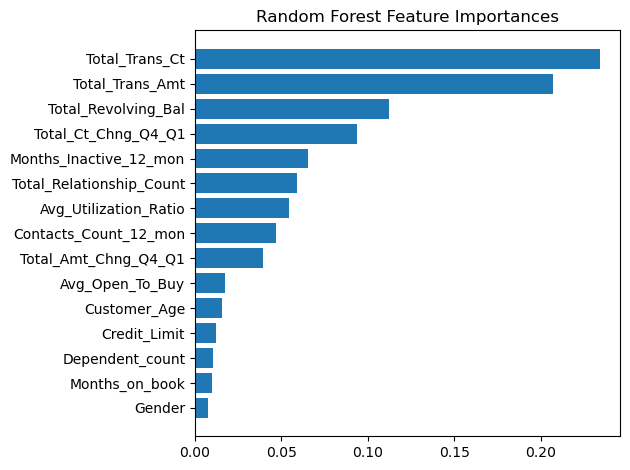

In [210]:
y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots()
ax.barh(y_ticks, values) # plt.barh():橫向 bar plot ; plt.bar()：正常柱状图
ax.set_yticklabels(best_vars)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()



In [203]:
feature = pd.Series(importances, index = x_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Ct              0.234104
Total_Trans_Amt             0.206981
Total_Revolving_Bal         0.111928
Total_Ct_Chng_Q4_Q1         0.093983
Months_Inactive_12_mon      0.065246
Total_Relationship_Count    0.058940
Avg_Utilization_Ratio       0.054338
Contacts_Count_12_mon       0.046592
Total_Amt_Chng_Q4_Q1        0.039562
Avg_Open_To_Buy             0.017101
Customer_Age                0.015486
Credit_Limit                0.012405
Dependent_count             0.010410
Months_on_book              0.009847
Gender                      0.007739
Income_Category             0.005845
Education_Level             0.003996
Marital_Status_Married      0.002095
Marital_Status_Single       0.001544
Card_Category               0.001318
Marital_Status_Unknown      0.000542
dtype: float64


* 重要特徵 跟 EDA 有明顯差異的特徵有關連

# 5 Conclusion

我們可以得出結論：
* 前 3 個最有影響力的特徵是產品變量：“Total_Trans_Ct”、“Total_Trans_Amt”、“Total_Revolving_Bal”。

  
使用 隨機森林model
* Basic : reacll 78 % ; precision 93 % ; F1 85 % ; Accuracy  96 %
* Basic + SMOTE : reacll 83% ; precision 87 %  ; F1 85 % ; Accuracy 95% 
* Basic + SMOTE + GridSearch : reacll 86% ; precision 78 % ; F1 82 % ; Accuracy  94 %

雖然損失了一些precision，但是recall有上升，因為流失的客戶為我們主要關心客群，這裡的降低的精確率所誤放的客群，我們也可以更加強宣傳。